<a href="https://colab.research.google.com/github/raregem-AI/Pridicting-Solar-Power-with-Machine-Learning/blob/main/DSN_2024_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                                   Heart Disease prediction
##   Data Science Nigeria X Microsoft 2024 AI Bootcamp Qualification Hackathon the DSN AI Bootcamp 2024





# Introduction

The challenge at hand revolves around the creation of a sophisticated predictive model aimed at determining the likelihood of an individual having heart disease. As one of the leading causes of global mortality, detecting heart disease in its early stages is pivotal for enhancing patient outcomes and halting its progression. The conventional diagnostic methods often come with substantial costs and time requirements. Thus, there exists a pressing need for a cutting-edge predictive model that can evaluate the risk of heart disease utilizing easily accessible patient information.

The objective of this challenge is to design and build a predictive model capable of accurately determining the probability of an individual having heart disease. The focus is on leveraging machine learning techniques to create a model that can analyze relevant features and provide reliable predictions. The model should demonstrate high accuracy and generalizability, ensuring its effectiveness on new, unseen data.

Solving this challenge holds great significance. Early prediction aids in timely intervention and prevention, optimizing healthcare resources. The cost-effectiveness of predictive models reduces unnecessary procedures, benefiting patients and healthcare systems. Targeted public health efforts can stem from aggregated data, and research also advances through model insights. Ultimately, this challenge addresses a crucial healthcare issue using advanced machine learning, promising improved interventions and better health outcomes.

# Dataset Description

1 age

2 sex

3 chest pain type (4 values)

4 resting blood pressure

5 serum cholestoral in mg/dl

6 fasting blood sugar > 120 mg/dl

7 "resting electrocardiographic results (values 0,1,2)"

8  maximum heart rate achieved


9 oldpeak = ST depression induced by exercise relative to rest

10 the slope of the peak exercise ST segment

11 number of major vessels (0-3) colored by flourosopy

12 thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [1]:
#Importing Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.preprocessing import KBinsDiscretizer
#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


### Loading the Data

In [2]:
#Loading the data
train = pd.read_csv("/content/drive/MyDrive/Data/DSN_Hack_2024_updated_Train Dataset  (1).csv")
test = pd.read_csv("/content/drive/MyDrive/Data/DSN_Hack_2024_updated_Test Dataset (1).csv")
submissin = pd.read_csv("/content/drive/MyDrive/Data/DSN_2024_Hackathon_Sample Submission.csv")
metadata = pd.read_csv("/content/drive/MyDrive/Data/DSN_2024_Hackathon_Variable_Definitions.csv")

In [3]:
train.head()

Id  Age  Sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  16167   33    0   1       158   205    1        0      154      0      1.5   
1  11275   53    1   2       198   154    0        1      104      0      0.8   
2  13251   37    1   2       101   202    1        0      155      0      2.1   
3  19921   75    0   0       113   306    1        2       88      1      4.9   
4  11293   35    1   2       139   419    1        1      166      1      0.9   

   slope  ca  thal  target  
0      1   4     1       1  
1      2   1     0       0  
2      1   3     1       1  
3      0   2     2       1  
4      2   4     0       1

In [ ]:
test.head()

id  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  16501   70    1   0       163   495    0        2      170      1      2.0   
1  10444   61    1   0       131   238    0        2       74      1      4.9   
2  14288   53    1   0        95   558    1        1       73      1      0.7   
3  10409   37    0   1       178   287    0        1      192      1      5.7   
4  17330   35    0   3       104   281    0        0      122      0      1.3   

   slope  ca  thal  
0      1   0     1  
1      2   2     2  
2      1   1     0  
3      1   0     0  
4      1   4     3

In [ ]:
metadata.head(20).T

0    1                           2   \
Variable defination  age  sex  chest pain type (4 values)   

                                         3                           4   \
Variable defination  resting blood pressure  serum cholestoral in mg/dl   

                                                  5   \
Variable defination  fasting blood sugar > 120 mg/dl   

                                                                    6   \
Variable defination  resting electrocardiographic results (values 0...   

                                              7                        8   \
Variable defination  maximum heart rate achieved  exercise induced angina   

                                                                    9   \
Variable defination  oldpeak = ST depression induced by exercise re...   

                                                            10  \
Variable defination  the slope of the peak exercise ST segment   

                                                                    11  \
Variable defination  number of major vessels (0-3) colored by flour...   

                                                                    12  
Variable defination  thal: 0 = normal; 1 = fixed defect; 2 = revers...

In [ ]:
#data info
#exploring the data type
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697 entries, 0 to 2696
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        2697 non-null   int64  
 1   age       2697 non-null   int64  
 2   sex       2697 non-null   int64  
 3   cp        2697 non-null   int64  
 4   trestbps  2697 non-null   int64  
 5   chol      2697 non-null   int64  
 6   fbs       2697 non-null   int64  
 7   restecg   2697 non-null   int64  
 8   thalach   2697 non-null   int64  
 9   exang     2697 non-null   int64  
 10  oldpeak   2697 non-null   float64
 11  slope     2697 non-null   int64  
 12  ca        2697 non-null   int64  
 13  thal      2697 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 295.1 KB


In [ ]:
#Statistical description
train.describe()

Id          Age          Sex           cp     trestbps  \
count   7303.000000  7303.000000  7303.000000  7303.000000  7303.000000   
mean   15021.535396    53.172669     0.499658     1.502533   147.447487   
std     2886.026080    14.185970     0.500034     1.115594    31.099538   
min    10001.000000    29.000000     0.000000     0.000000    94.000000   
25%    12521.500000    41.000000     0.000000     1.000000   120.000000   
50%    15054.000000    53.000000     0.000000     1.000000   148.000000   
75%    17513.500000    65.000000     1.000000     3.000000   174.000000   
max    19998.000000    77.000000     1.000000     3.000000   200.000000   

              chol          fbs      restecg      thalach        exang  \
count  7303.000000  7303.000000  7303.000000  7303.000000  7303.000000   
mean    342.805970     0.493085     1.013008   136.506093     0.503218   
std     127.291998     0.499986     0.815806    38.141966     0.500024   
min     126.000000     0.000000     0.000000    71.000000     0.000000   
25%     231.000000     0.000000     0.000000   104.000000     0.000000   
50%     341.000000     0.000000     1.000000   137.000000     1.000000   
75%     450.000000     1.000000     2.000000   170.000000     1.000000   
max     564.000000     1.000000     2.000000   202.000000     1.000000   

           oldpeak        slope           ca         thal       target  
count  7303.000000  7303.000000  7303.000000  7303.000000  7303.000000  
mean      3.129851     0.991510     2.019033     1.502259     0.813501  
std       1.791160     0.817291     1.410546     1.113137     0.389535  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       1.600000     0.000000     1.000000     1.000000     1.000000  
50%       3.100000     1.000000     2.000000     1.000000     1.000000  
75%       4.700000     2.000000     3.000000     2.000000     1.000000  
max       6.200000     2.000000     4.000000     3.000000     1.000000

### Exploratory Data Analysis

### Exploring the Age Column

In [ ]:
# let's summarie the age column
train['Age'].describe()

count    7303.000000
mean       53.172669
std        14.185970
min        29.000000
25%        41.000000
50%        53.000000
75%        65.000000
max        77.000000
Name: Age, dtype: float64

In [ ]:
# draw a histogram to see the distribution of age column
sns.histplot(train['Age'], kde=True)

<Axes: xlabel='Age', ylabel='Count'>

In [ ]:
# plot the mean, median and mode of age column using sns
sns.histplot(train['Age'], kde=True)
plt.axvline(train['Age'].mean(), color='red')
plt.axvline(train['Age'].median(), color='green')
plt.axvline(train['Age'].mode()[0], color='blue')

# print the value of mean, median and mode of age column
print('Mean:', train['Age'].mean())
print('Median:', train['Age'].median())
print('Mode:', train['Age'].mode()[0])

Mean: 53.17266876626044
Median: 53.0
Mode: 62


### Exploring Gender Based Distribution

*************************
.: Sex (Gender) Total :.
*************************


Sex
0    3654
1    3649
Name: count, dtype: int64

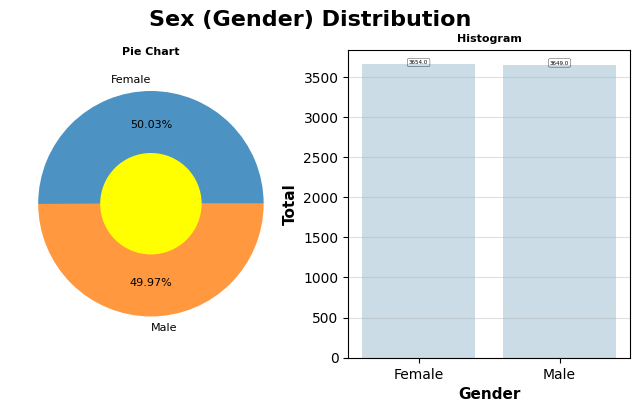

In [ ]:
# --- Setting Colors, Labels, Order ---
labels=['Female', 'Male']
order=train['Sex'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(8, 4))
plt.suptitle('Sex (Gender) Distribution', fontweight='heavy',
             fontsize='16', fontfamily='sans-serif',)
# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=8,
          fontfamily='sans-serif',)
plt.pie(train['Sex'].value_counts(), labels=labels, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8,),
        textprops={'fontsize':8})
centre=plt.Circle((0, 0), 0.45, fc='yellow',)
plt.gcf().gca().add_artist(centre)
# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=8,
          fontfamily='sans-serif',)
ax = sns.countplot(x='Sex', data=train, order=order, alpha=0.25)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+4.25,rect.get_height(),
             horizontalalignment='center', fontsize=4,
             bbox=dict(facecolor='none',
                       linewidth=0.25, boxstyle='round'))
plt.xlabel('Gender', fontweight='bold', fontsize=11, fontfamily='sans-serif',
           )
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif',
          )
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 25)
print('\033[1m'+'.: Sex (Gender) Total :.'+'\033[0m')
print('*' * 25)
train.Sex.value_counts(dropna=False)

In [ ]:
# plot the histogram of age column using plotly and coloring this by sex

fig = px.histogram(data_frame=train, x='Age', color='Sex')
fig.show()

In [ ]:
# find the values of sex column
train['Sex'].value_counts()

Sex
0    3654
1    3649
Name: count, dtype: int64

In [ ]:
# calculate the percentages of male and female value counts in the data
male_count = 3654
female_count = 3649
total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# display the results
print(f"Male percentage in the data: {male_percentage:.2f}%")
print(f"Female Percentage in the data: {female_percentage:.2f}%")

# difference
difference_percentage = ((male_count - female_count) / female_count) * 100
print(f"Males are {difference_percentage:.2f}% more than females in the data.")

Male percentage in the data: 50.03%
Female Percentage in the data: 49.97%
Males are 0.14% more than females in the data.


In [ ]:
# Plot Same Plot Using Plotly and Coloring this by sex
fig = px.pie(train, names='Sex', color='Sex')
fig.show()

### Insights
- The percentage of female and male are averagely the same

###Let's explore cp (Chest Pain) column:

Types of Chest pain :

- Asymptomatic: No chest pain or discomfort.(0)
- Non-Anginal: Chest pain not typical of heart-related issues; requires further investigation.                            (1)
- Atypical Angina: Chest pain with characteristics different from typical heart-related chest pain.              (2)
- Typical Angina: Classic chest pain indicating  potential insufficient blood supply to the heart.                (3)

In [ ]:
# value count of cp column
train['cp'].value_counts()

cp
1    1858
3    1829
2    1814
0    1802
Name: count, dtype: int64

In [ ]:
cp_num = pd.crosstab(train.cp, train.target)
cp_num

target    0     1
cp               
0         0  1802
1       480  1378
2       451  1363
3       431  1398

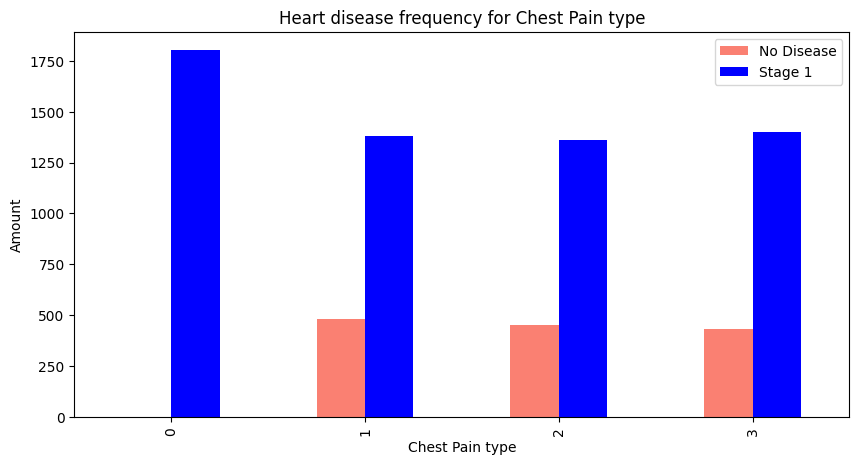

In [25]:
# Add Some Helpful info
pd.crosstab(train.cp,train.target).plot(kind="bar",figsize=(10,5),
                               color = ['salmon','blue','pink','lightblue','green'])
plt.title('Heart disease frequency for Chest Pain type')
plt.xlabel('Chest Pain type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'],loc='upper right')

### Insights:
- No chest pain is higher with heart disease
- There are equal level of   stage 1 ,2, and 3 of chest pain
- The level of no heart disease is equal in  stages 1,2,and
- Heart disease is not only  related to chest pain


In [ ]:
# draw the plot of sex column grouped by cp column using plotly

fig = px.histogram(train, x="cp", color="Sex", barmode="group")
# Update layout to set labels
fig.update_layout(
    title="The relationship between cp and  Sex",
    xaxis_title="cp",  # Set x-axis label
    yaxis_title="Count"  # Set y-axis label
)
fig.show()

### Insight:
- Wemen have the highest level of stage 3 chest pain, which could possibly means that they have the highest level of heart diseases

In [ ]:
# # draw the plot of age column grouped by cp column using plotly
# fig = px.histogram(data_frame=df, x='cp', color='sex')
# fig.show()

In [ ]:
# draw the plot of age column grouped by cp column using plotly

fig = px.histogram(train, x="Age", color="cp", barmode="group")
# Update layout to set labels
fig.update_layout(
    title="Chest pain distribution across different ages ",
    xaxis_title="Age",  # Set x-axis label
    yaxis_title="Count"  # Set y-axis label
)
fig.show()


In [ ]:
# draw the plot of age column grouped by cp column using plotly
fig = px.histogram(data_frame=train, x='Age', color='cp')
# Update layout to set labels
fig.update_layout(
    title="The relationship between cp and Age",
    xaxis_title="Age",  # Set x-axis label
    yaxis_title="Count"  # Set y-axis label
)
fig.show()

In [ ]:
# draw the plot of cp column grouped by targetcolumn using plotly
fig = px.histogram(train, x="cp", color="target", barmode="group")
fig = px.histogram(train, x="cp", color="target", barmode="group")

# Update layout to set labels
fig.update_layout(
    title="The relationship between cp and heart disease",
    xaxis_title="cp",  # Set x-axis label
    yaxis_title="Count"  # Set y-axis label
)
fig.show()

### Insights
- There are of chest pain in the classes
-

******************************
.: Chest Pain Type Total :.
******************************


cp
1    1858
3    1829
2    1814
0    1802
Name: count, dtype: int64

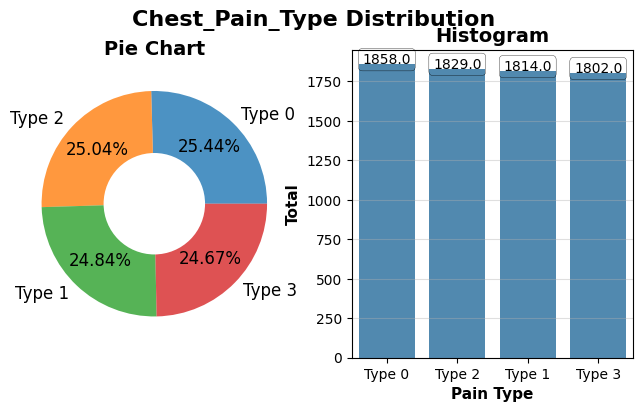

In [ ]:
# --- Setting , Labels, Order ---
labels=['Type 0', 'Type 2', 'Type 1', 'Type 3']
order=train['cp'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(8, 4))
plt.suptitle('Chest_Pain_Type Distribution', fontweight='heavy', fontsize=16,
             fontfamily='sans-serif',)

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,fontfamily='sans-serif',
           )
plt.pie(train['cp'].value_counts(), labels=labels, pctdistance=0.7,
        autopct='%.2f%%', textprops={'fontsize':12},
        wedgeprops=dict(alpha=0.8,))
centre=plt.Circle((0, 0), 0.45, fc='white',)
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          )
ax = sns.countplot(x='cp', data=train, order=order,
                alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+4.25,rect.get_height(),
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Pain Type', fontweight='bold', fontsize=11, fontfamily='sans-serif',
           )
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif',
           )
plt.xticks([0, 1, 2, 3], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 30)
print('\033[1m'+'.: Chest Pain Type Total :.'+'\033[0m')
print('*' * 30)
train.cp.value_counts(dropna=False)

###Let'e explore the trestbps (resting blood pressure) column:
- The normal resting blood pressure is 120/80 mm Hg.

high blood pressure increasing the risk of heart disease and stroke, often asymptomatic, while low blood pressure can lead to dizziness and fainting

In [ ]:
# find the value counts of trestbps column
train['trestbps'].describe()

count    7303.000000
mean      147.447487
std        31.099538
min        94.000000
25%       120.000000
50%       148.000000
75%       174.000000
max       200.000000
Name: trestbps, dtype: float64

In [ ]:
# Plotting Resting Blood Pressure vs Disease
fig = go.Figure()
fig.add_trace(go.Box(y=train['trestbps'].values , name='BP at Rest for all', marker_color = 'green',boxmean=True))
fig.add_trace(go.Box(y=train[train['target']== 0]['trestbps'].values, name ='No Disease', marker_color = 'blue', boxmean = True))
fig.add_trace(go.Box(y=train[train['target'] !=0]['trestbps'].values, name ='Heart Disease', marker_color = 'red', boxmean = True))
fig.update_layout(title = 'BP Distribution (at rest)', yaxis_title = 'Blood Pressure (mm/Hg)', title_x = 0.5)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

<Axes: xlabel='trestbps', ylabel='Count'>

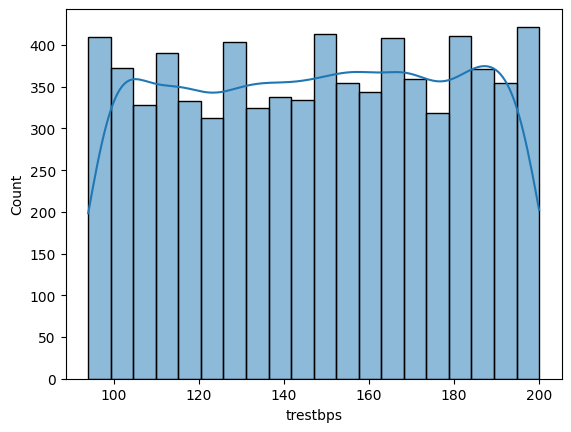

In [ ]:
# create a histplot of trestbps column
sns.histplot(train['trestbps'], kde=True)

********************************
.: Fasting_Blood_Sugar Total :.
********************************


fbs
0    3702
1    3601
Name: count, dtype: int64

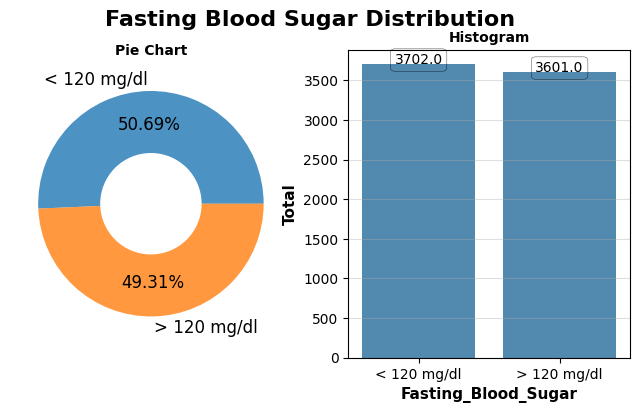

In [26]:
# --- Setting Labels, Order ---
labels=['< 120 mg/dl', '> 120 mg/dl']
order=train['fbs'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(8, 4))
plt.suptitle('Fasting Blood Sugar Distribution', fontweight='heavy',
             fontsize=16, fontfamily='sans-serif',)

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=10, fontfamily='sans-serif',
          )
plt.pie(train['fbs'].value_counts(), labels=labels,
        wedgeprops=dict(alpha=0.8,), autopct='%.2f%%',
         pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white',)
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=10, fontfamily='sans-serif',
          )
ax = sns.countplot(x='fbs', data=train,  order=order,
                    alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+4.25,rect.get_height(),
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Fasting_Blood_Sugar', fontweight='bold', fontsize=11,
           fontfamily='sans-serif',)
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif',)
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 32)
print('\033[1m'+'.: Fasting_Blood_Sugar Total :.'+'\033[0m')
print('*' * 32)
train.fbs.value_counts(dropna=False)

# Insight:
- The percentage of  Normal blood sugar is higher than abnormal blood sugar level

**************************************************
.: Resting Electrocardiographic Results Total :.
**************************************************


restecg
2    2478
1    2442
0    2383
Name: count, dtype: int64

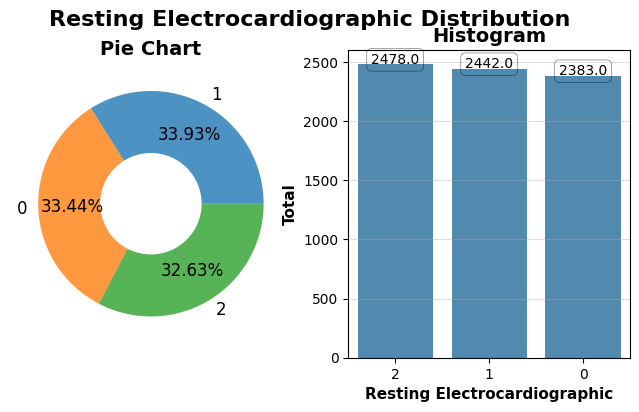

In [27]:
# --- Setting  Labels, Order ---
labels=['1', '0', '2']
order=train['restecg'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(8, 4))
plt.suptitle('Resting Electrocardiographic Distribution', fontweight='heavy',
             fontsize=16, fontfamily='sans-serif',)

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', )
plt.pie(train['restecg'].value_counts(), labels=labels,
        wedgeprops=dict(alpha=0.8), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', )
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          )
ax = sns.countplot(x='restecg', data=train, order=order,
                    alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+4.25,rect.get_height(),
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', linewidth=0.25,
                         boxstyle='round'))

plt.xlabel('Resting Electrocardiographic', fontweight='bold', fontsize=11,
           fontfamily='sans-serif',)
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif',
           )
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 50)
print('\033[1m'+'.: Resting Electrocardiographic Results Total :.'+'\033[0m')
print('*' * 50)
train.restecg.value_counts(dropna=False)

***********************************
.: Exercise Induced Angina Total :.
***********************************


exang
1    3675
0    3628
Name: count, dtype: int64

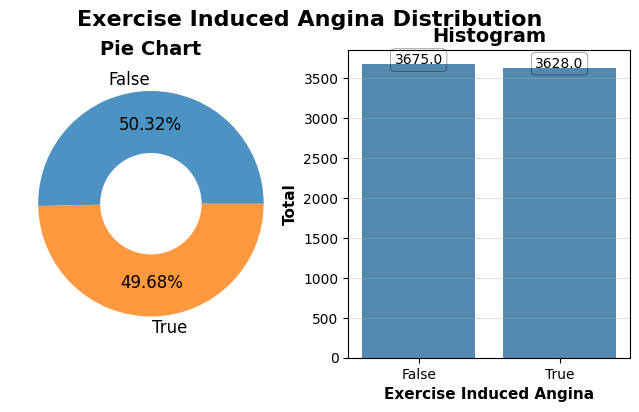

In [28]:
# --- Setting Colors, Labels, Order ---
labels=['False', 'True']
order=train['exang'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(8, 4))
plt.suptitle('Exercise Induced Angina Distribution', fontweight='heavy',
             fontsize=16, fontfamily='sans-serif', )

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          )
plt.pie(train['exang'].value_counts(), labels=labels,
        wedgeprops=dict(alpha=0.8,), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white',)
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif',
        )
ax = sns.countplot(x='exang', data=train, order=order,
                   alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+4.25,rect.get_height(),
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Exercise Induced Angina', fontweight='bold', fontsize=11,
           fontfamily='sans-serif', )
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif',
           )
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 35)
print('\033[1m'+'.: Exercise Induced Angina Total :.'+'\033[0m')
print('*' * 35)
train.exang.value_counts(dropna=False)

****************************************
.: Number of Major Vessels Total :.
****************************************


ca
2    1505
4    1488
3    1448
1    1439
0    1423
Name: count, dtype: int64

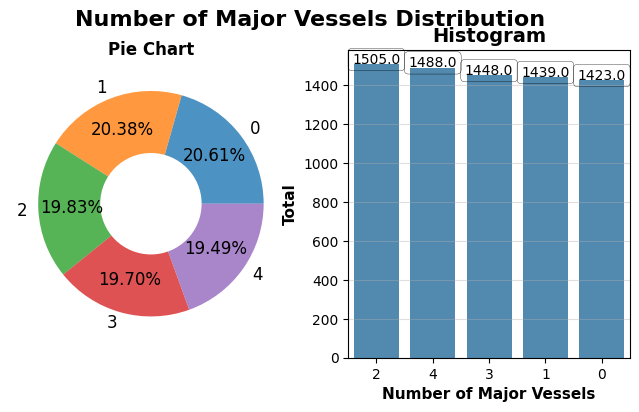

In [29]:
# --- Setting Colors, Labels, Order ---
labels=['0', '1', '2', '3', '4']
order=train['ca'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(8, 4))
plt.suptitle('Number of Major Vessels Distribution', fontweight='heavy',
             fontsize=16, fontfamily='sans-serif',)

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=12, fontfamily='sans-serif',
          )
plt.pie(train['ca'].value_counts(), labels=labels,
        wedgeprops=dict(alpha=0.8,),
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize':12})

centre=plt.Circle((0, 0), 0.45, fc='white', )
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          )
ax = sns.countplot(x='ca', data=train,  order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+4.25,rect.get_height(),
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none',  linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Number of Major Vessels', fontweight='bold', fontsize=11,
           fontfamily='sans-serif', )
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif',
           )
plt.grid(axis='y', alpha=0.4)
countplt
# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 40)
print('\033[1m'+'.: Number of Major Vessels Total :.'+'\033[0m')
print('*' * 40)
train.ca.value_counts(dropna=False)

********************
.: "thal" Total :.
********************


thal
1    1879
3    1822
2    1813
0    1789
Name: count, dtype: int64

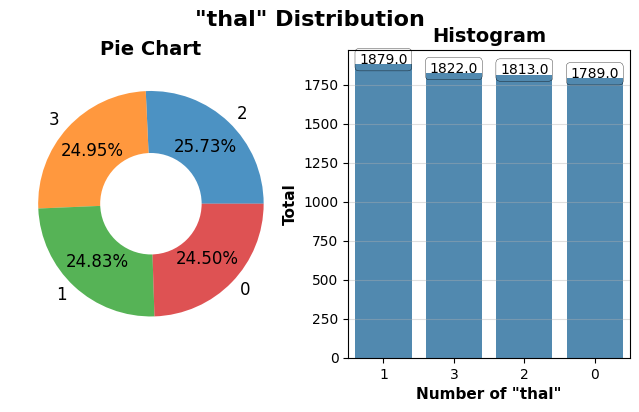

In [30]:
# --- Setting Colors, Labels, Order ---
labels=['2', '3', '1', '0']
order=train['thal'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(8,4))
plt.suptitle('"thal" Distribution', fontweight='heavy', fontsize=16,
             fontfamily='sans-serif', )

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          )
plt.pie(train['thal'].value_counts(), labels=labels,
        wedgeprops=dict(alpha=0.8, ),
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize':12})

centre=plt.Circle((0, 0), 0.45, fc='white', )
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          )
ax = sns.countplot(x='thal', data=train, order=order,
                    alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+4.25,rect.get_height(),
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none',  linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Number of "thal"', fontweight='bold', fontsize=11,
           fontfamily='sans-serif', )
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif',
           )
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 20)
print('\033[1m'+'.: "thal" Total :.'+'\033[0m')
print('*' * 20)
train.thal.value_counts(dropna=False)

*********************************************
.: Heart Diseases Status (target) Total :.
*********************************************


target
1    5941
0    1362
Name: count, dtype: int64

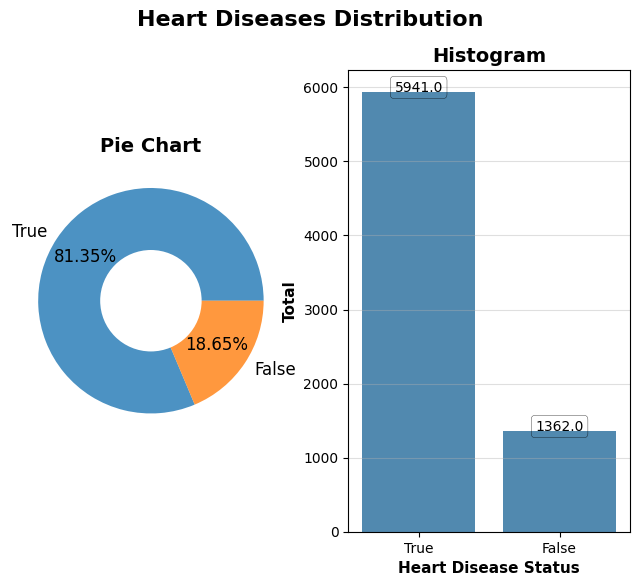

In [31]:
# --- Setting Colors, Labels, Order ---

labels=['True', 'False']
order=train['target'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(8,6))
plt.suptitle('Heart Diseases Distribution', fontweight='heavy',
             fontsize=16, fontfamily='sans-serif',)

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',)
plt.pie(train['target'].value_counts(), labels=labels,
        wedgeprops=dict(alpha=0.8,), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white',)
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          )
ax = sns.countplot(x='target', data=train, order=order,
                    alpha=0.85)
for rect in ax.patches:
      ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+4.25,rect.get_height(),
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Heart Disease Status', fontweight='bold', fontsize=11,
           fontfamily='sans-serif', )
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif',
           )
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 45)
print('\033[1m'+'.: Heart Diseases Status (target) Total :.'+'\033[0m')
print('*' * 45)
train.target.value_counts(dropna=False)

In [32]:
# --- Descriptive Statistics ---
train.select_dtypes(exclude='object').describe().T.style.background_gradient(cmap='Greens').set_properties(**{'font-family': 'Segoe UI'})

In [35]:
# --- Variable, Color & Plot Size ---


from statsmodels.graphics.gofplots import qqplot

var = 'Age'
fig=plt.figure(figsize=(7, 7))

# --- Skewness & Kurtosis ---
#print('\033[1m'+'.: Age Column Skewness & Kurtosis :.'+'\033[0m')
#print('*' * 40)
#print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
#print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
#print('\n')

# --- General Title ---
fig.suptitle('Age Column Distribution', fontweight='bold', fontsize=16,
             fontfamily='sans-serif', )
fig.subplots_adjust(top=0.9)
# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', )
sns.histplot(data=train, x=var, kde=True, )
plt.xlabel('Total', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', )
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif',
           )
# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', )
qqplot(train[var], fit=True, line='45', ax=ax_2,
        alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', )
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11,
           fontfamily='sans-serif',)


# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          )
sns.boxplot(data=train, y=var,  boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif',
           )

plt.show()

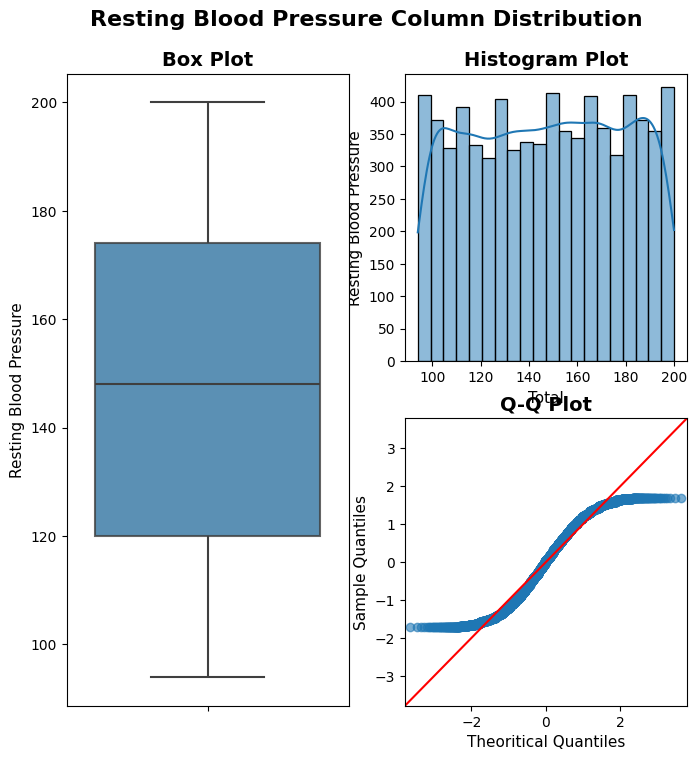

In [37]:
# --- Variable, Color & Plot Size ---
var = 'trestbps'
fig=plt.figure(figsize=(8, 8))

# --- Skewness & Kurtosis ---
#print('\033[1m'+'.: Resting Blood Pressure Column Skewness & Kurtosis :.'+'\033[0m')
#print('*' * 55)
#print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
#print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
#print('\n')
# --- General Title ---
fig.suptitle('Resting Blood Pressure Column Distribution', fontweight='bold',
             fontsize=16, fontfamily='sans-serif', )
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', )
sns.histplot(data=train, x=var, kde=True, )
plt.xlabel('Total', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', )
plt.ylabel('Resting Blood Pressure', fontweight='regular', fontsize=11,
           fontfamily='sans-serif',)
# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', )
qqplot(train[var], fit=True, line='45', ax=ax_2,
        alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', )
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', )
# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          )
sns.boxplot(data=train, y=var,  boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Resting Blood Pressure', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', )

plt.show()

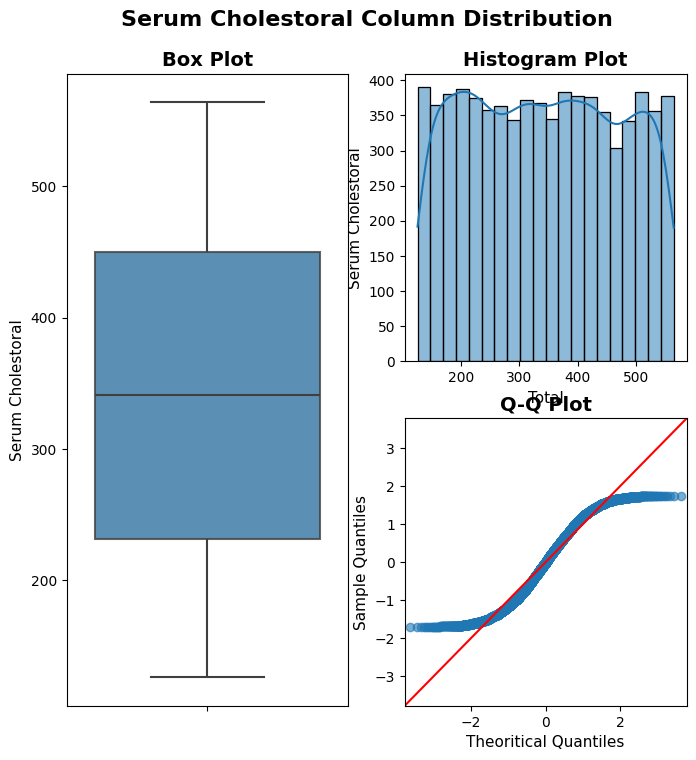

In [38]:
# --- Variable, Color & Plot Size ---
var = 'chol'
fig=plt.figure(figsize=(8, 8))

# --- Skewness & Kurtosis ---
# print('\033[1m'+'.: Serum Cholestoral Column Skewness & Kurtosis :.'+'\033[0m')
# print('*' * 45)
# print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
# print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
# print('\n')
# --- General Title ---
fig.suptitle('Serum Cholestoral Column Distribution', fontweight='bold',
             fontsize=16, fontfamily='sans-serif', )
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', )
sns.histplot(data=train, x=var, kde=True, )
plt.xlabel('Total', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', )
plt.ylabel('Serum Cholestoral', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', )
# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif',
        )
qqplot(train[var], fit=True, line='45', ax=ax_2,
        alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', )
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', )
# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', )
sns.boxplot(data=train, y=var,  boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Serum Cholestoral', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', )

plt.show()

In [39]:
# --- Variable, Color & Plot Size ---
var = 'thalach'
fig=plt.figure(figsize=(8, 8))

# --- Skewness & Kurtosis ---
#print('\033[1m'+'.: Maximum Heart Rate Column Skewness & Kurtosis :.'+'\033[0m')
#print('*' * 50)
#print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
#print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
#print('\n')

# --- General Title ---
fig.suptitle('Maximum Heart Rate Column Distribution', fontweight='bold',
             fontsize=16, fontfamily='sans-serif', )
fig.subplots_adjust(top=0.9)
# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', )
sns.histplot(data=train, x=var, kde=True, )
plt.xlabel('Total', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', )
plt.ylabel('Maximum Heart Rate', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', )

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          )
qqplot(train[var], fit=True, line='45', ax=ax_2,
        alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', )
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', )

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', )
sns.boxplot(data=train, y=var, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Maximum Heart Rate', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', )

plt.show()

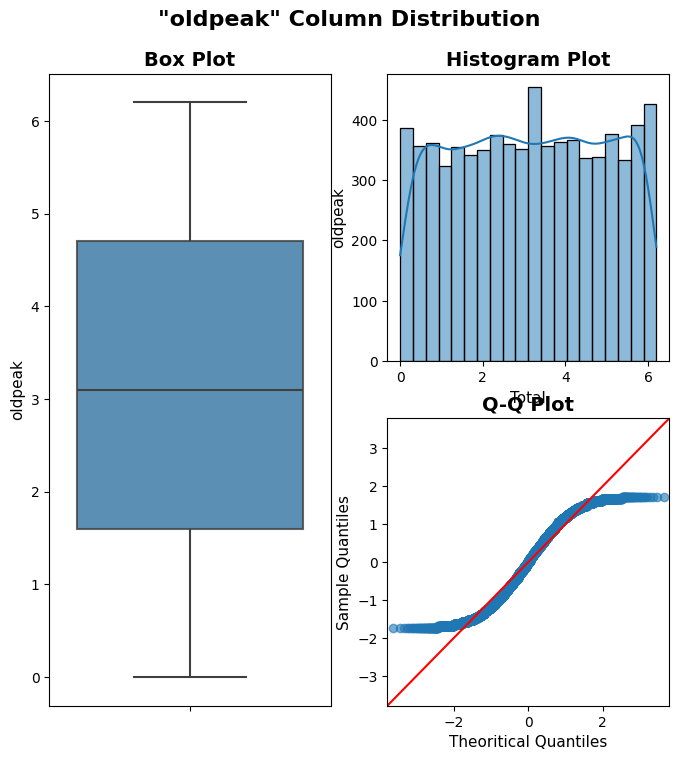

In [41]:
# --- Variable, Color & Plot Size ---
var = 'oldpeak'

fig=plt.figure(figsize=(8, 8))

# --- Skewness & Kurtosis ---
#print('\033[1m'+'.: "oldpeak" Column Skewness & Kurtosis :.'+'\033[0m')
#print('*' * 40)
#print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
#print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
#print('\n')

# --- General Title ---
fig.suptitle('"oldpeak" Column Distribution', fontweight='bold',
             fontsize=16, fontfamily='sans-serif', )
fig.subplots_adjust(top=0.9)
# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', )
sns.histplot(data=train, x=var, kde=True,)
plt.xlabel('Total', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', )
plt.ylabel('oldpeak', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', )

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif',
        )
qqplot(train[var], fit=True, line='45', ax=ax_2, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', )
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', )

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', )
sns.boxplot(data=train, y=var, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('oldpeak', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', )

plt.show()

In [43]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Male', 'Female']

# --- Creating Bar Chart ---
ax = pd.crosstab(train.Sex, train.target).plot(kind='bar', figsize=(8, 5), alpha=0.85)
# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+1.25,rect.get_height(),
             horizontalalignment='center', fontsize=10)

plt.suptitle('Heart Disease Distribution based on Gender', fontweight='heavy',
             x=0.065, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif',
               )
plt.title('Female tend to have heart diseases compared to Male. In male, the distribution is not imbalanced compared to female\nthat have almost the same distribution',
          fontsize='8', fontfamily='sans-serif', loc='left', )
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Gender (Sex)', fontfamily='sans-serif', fontweight='bold',
           )
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold',
           )
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8',
           title_fontsize='9', loc='upper left', frameon=True);

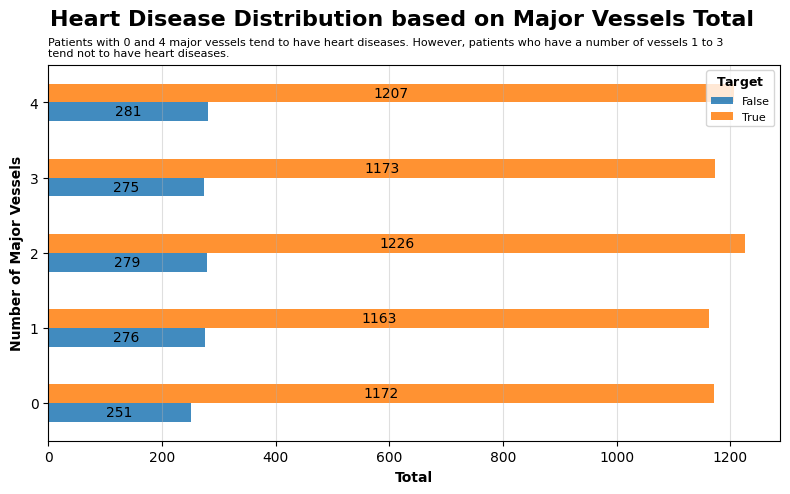

In [47]:
# --- Labels Settings ---
labels = ['False', 'True']

# --- Creating Horizontal Bar Chart ---
ax = pd.crosstab(train.ca, train.target).plot(kind='barh', figsize=(8, 5),

                            alpha=0.85)
# --- Horizontal Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(width),
             horizontalalignment='center', verticalalignment='center')

plt.suptitle('Heart Disease Distribution based on Major Vessels Total',
             fontweight='heavy', x=0.069, y=0.98, ha='left', fontsize='16',
             fontfamily='sans-serif', )
plt.title('Patients with 0 and 4 major vessels tend to have heart diseases. However, patients who have a number of vessels 1 to 3\ntend not to have heart diseases.',
                    fontsize='8', fontfamily='sans-serif', loc='left', )
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Total', fontfamily='sans-serif', fontweight='bold', )
plt.ylabel('Number of Major Vessels', fontfamily='sans-serif', fontweight='bold',
        )
plt.yticks(rotation=0)
plt.grid(axis='x', alpha=0.4)
plt.grid(axis='y', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', frameon=True,
           title_fontsize='9', loc='upper right');

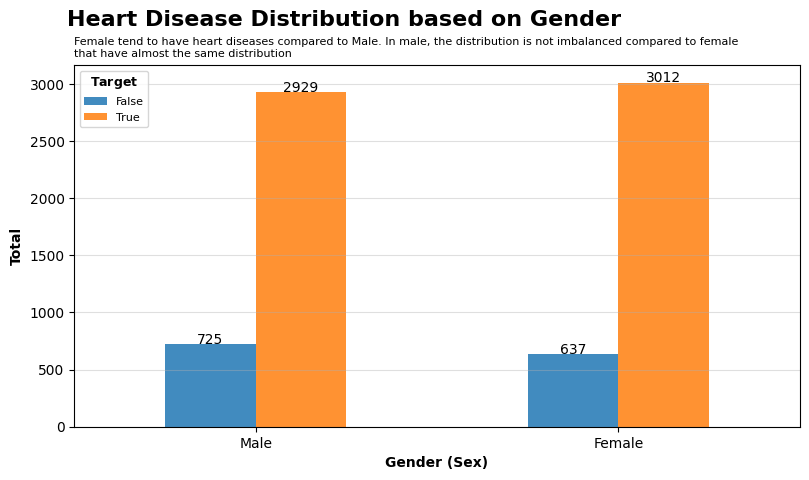

In [46]:
gender = np.array([0, 1])
label_gender = np.array([0, 1])

label_gender2 = ['Male', 'Female']

# --- Creating Bar Chart ---
ax = pd.crosstab(train.Sex, train.target).plot(kind='bar', figsize=(8, 5),

                                         alpha=0.85)
# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+4.25,rect.get_height(),
             horizontalalignment='center', fontsize=10)
    plt.suptitle('Heart Disease Distribution based on Gender', fontweight='heavy',
             x=0.065, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif',
             )
plt.title('Female tend to have heart diseases compared to Male. In male, the distribution is not imbalanced compared to female\nthat have almost the same distribution',
          fontsize='8', fontfamily='sans-serif', loc='left',)
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Gender (Sex)', fontfamily='sans-serif', fontweight='bold',
           )
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold',
           )
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8',
           title_fontsize='9', loc='upper left', frameon=True);

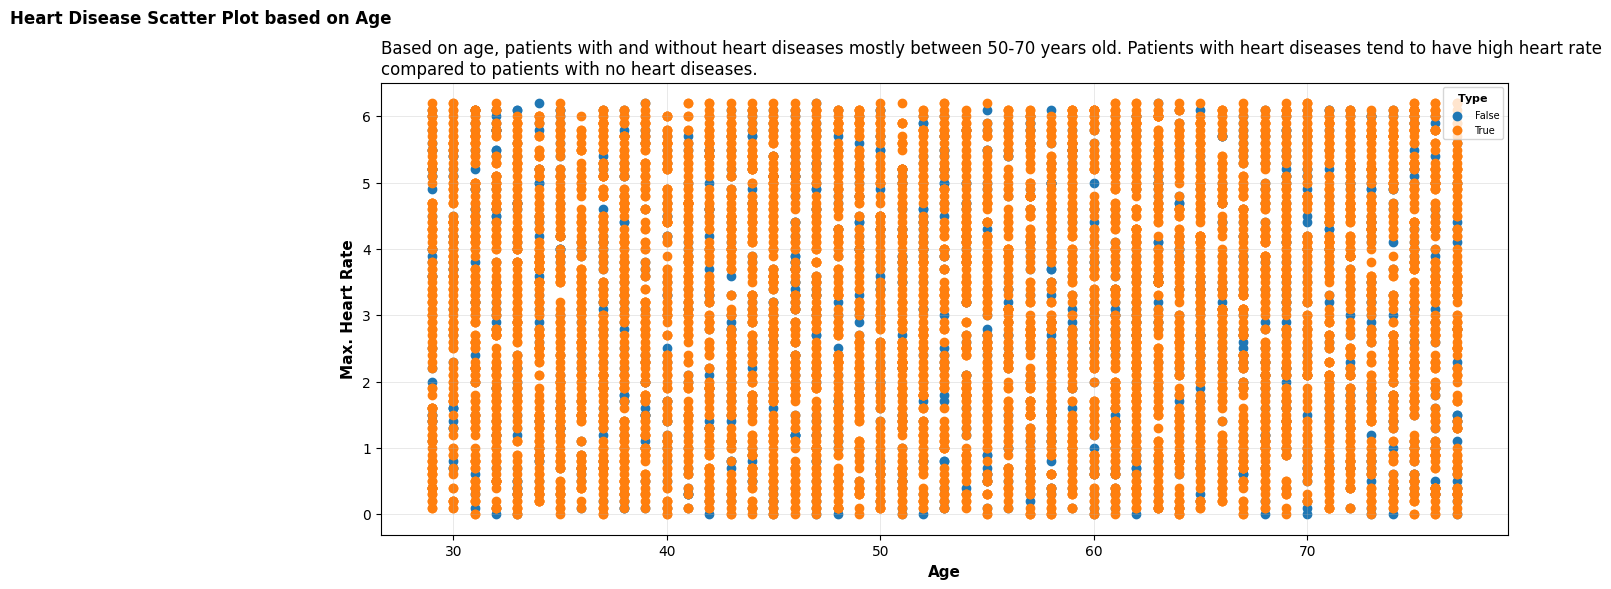

In [8]:
# -- Scatter Plot Size & Titles Settings ---
plt.figure(figsize=(12, 6))
plt.suptitle('Heart Disease Scatter Plot based on Age', fontweight='heavy',
             x=0.048, y=0.98, fontsize='12', ha='right', fontfamily='sans-serif',
             )
plt.title('Based on age, patients with and without heart diseases mostly between 50-70 years old. Patients with heart diseases tend to have high heart rate\ncompared to patients with no heart diseases.',
          fontsize='12', fontfamily='sans-serif', loc='left', )
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# --- Creating Scatter Plot ---
plt.scatter(x=train.Age[train.target==0], y=train.oldpeak[(train.target==0)], )
plt.scatter(x=train.Age[train.target==1], y=train.oldpeak[(train.target==1)],)
# --- Scatter Plot Legend & Labels Settings ---
plt.legend(['False', 'True'], title='$\\bf{Type}$', fontsize='7',
           title_fontsize='8', loc='upper right', frameon=True)
plt.xlabel('Age', fontweight='bold', fontsize='11',
           fontfamily='sans-serif', )
plt.ylabel('Max. Heart Rate', fontweight='bold', fontsize='11',
           fontfamily='sans-serif', )
plt.ticklabel_format(style='plain', axis='both')
plt.grid(axis='both', alpha=0.4, lw=0.5)
plt.show();

In [14]:
# -- Violin Plot Size & Titles Settings ---
fig, ax = plt.subplots()
fig.set_size_inches(9, 5)
plt.suptitle('Chest Pain Type Distribution based on Age', fontweight='heavy',
             x=0.028, y=0.98, ha='left', fontsize='20', fontfamily='sans-serif',
             )
plt.title('It can be seen that the lowest patient age is in chest pain types 1 ,2 and 3. In addition, the age distribution of patients who do not have heart disease is mostly around 55 years old. It can also be\nseen that patients who have heart disease are younger than those who do not have heart disease.',
          fontsize='12', fontfamily='sans-serif', loc='left', )
plt.tight_layout(rect=[0, 0.04, 1, 1.01])
# --- Creating Violin Plot based on Type ---


# Creating Violin Plot without boxprops
sns.violinplot(x='cp', y='Age', hue='target', data=train, ax=ax, split=True, linewidth=1.5)


# --- Violin Plot Legend & Labels Settings ---
plt.legend(title='$\\bf{Target}$', fontsize='10', title_fontsize='12', frameon=True,
           loc='upper right')
plt.xlabel('Chest Pain Type', fontweight='bold', fontsize='14',
           fontfamily='sans-serif', )
plt.ylabel('Age', fontweight='bold', fontsize='14', fontfamily='sans-serif',
           )
plt.xticks(fontsize='11')
plt.yticks(fontsize='11')
plt.grid(axis='y', alpha=0.4)
plt.show();

********************************
.: Fasting Blood Sugar Total :.
********************************


fbs
0    3702
1    3601
Name: count, dtype: int64

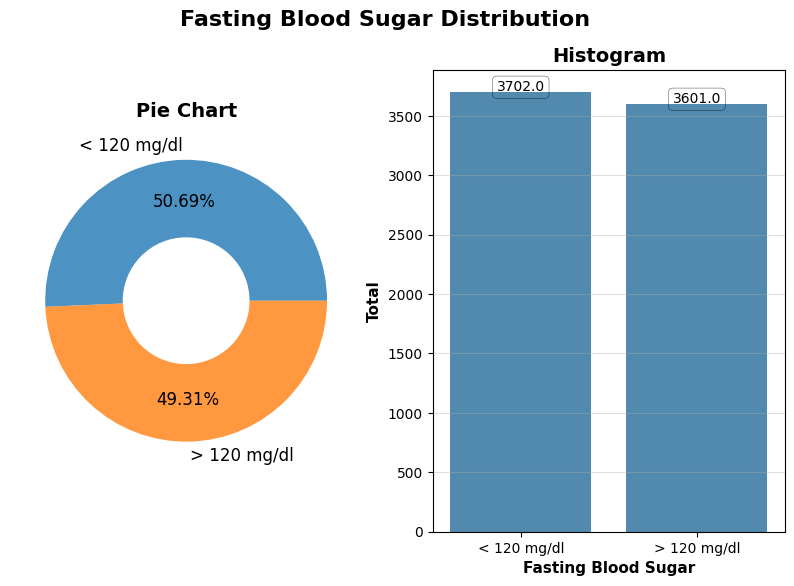

In [16]:
# --- Setting Colors, Labels, Order ---
labels=['< 120 mg/dl', '> 120 mg/dl']
order=train['fbs'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(10, 6))
plt.suptitle('Fasting Blood Sugar Distribution', fontweight='heavy',
             fontsize=16, fontfamily='sans-serif',)

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
        )
plt.pie(train['fbs'].value_counts(), labels=labels,
        wedgeprops=dict(alpha=0.8, ), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', )
plt.gcf().gca().add_artist(centre)
# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          )
ax = sns.countplot(x='fbs', data=train,  order=order,
                   alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+4.25,rect.get_height(),
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none',  linewidth=0.25,
                       boxstyle='round'))
plt.xlabel('Fasting Blood Sugar', fontweight='bold', fontsize=11,
           fontfamily='sans-serif', )
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif',
           )
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 32)
print('\033[1m'+'.: Fasting Blood Sugar Total :.'+'\033[0m')
print('*' * 32)
train.fbs.value_counts(dropna=False)

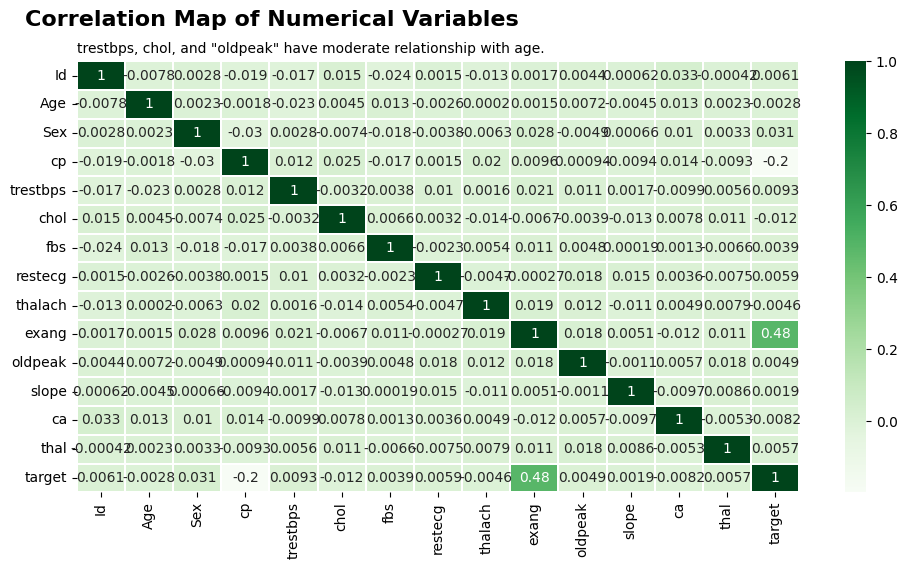

In [18]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize=(10, 6))
sns.heatmap(train.corr(), annot=True, cmap='Greens', linewidths=0.1)
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy',
             x=0.03, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif',
             )
plt.title('trestbps, chol, and "oldpeak" have moderate relationship with age.',
          fontsize='10', fontfamily='sans-serif', loc='left', )
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

In [21]:
# --- Creating Dummy Variables for cp, thal and slope ---
cp = pd.get_dummies(train['cp'], prefix='cp')
thal = pd.get_dummies(train['oldpeak'], prefix='oldpeak')
slope = pd.get_dummies(train['slope'], prefix='slope')

# --- Merge Dummy Variables to Main Data Frame ---
frames = [train, cp, thal, slope]
df = pd.concat(frames, axis = 1)

In [22]:
# --- Display New Data Frame ---
df.head().T.style.background_gradient(cmap='Greens').set_properties(**{'font-family': 'Segoe UI'})

In [23]:
# --- Seperating Dependent Features ---
x = df.drop(['target'], axis=1)
y = df['target']

In [24]:
# --- Data Normalization using Min-Max Method ---
x = MinMaxScaler().fit_transform(x)

In [25]:
# --- Splitting Dataset into 80:20 ---
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [37]:
# --- Applying Logistic Regression ---
LRclassifier = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')
LRclassifier.fit(x_train, y_train)

y_pred_LR = LRclassifier.predict(x_test)

In [38]:


# --- Import Confusion Matrix ---
from sklearn.metrics import confusion_matrix as  ConfusionMatrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score



### Lets Explore the chol Column
What is the chol : a fatty substance essential for body function, but elevated levels can contribute to heart disease.

In [ ]:
# First we Describe Chol
train['chol'].describe()

count    7303.000000
mean      342.805970
std       127.291998
min       126.000000
25%       231.000000
50%       341.000000
75%       450.000000
max       564.000000
Name: chol, dtype: float64

In [ ]:
# Cross Tab of chol and target
cross = pd.crosstab(train['chol'], train['target']).describe()
cross

target           0           1
count   439.000000  439.000000
mean      3.102506   13.533030
std       1.845881    3.588182
min       0.000000    4.000000
25%       2.000000   11.000000
50%       3.000000   13.000000
75%       4.000000   16.000000
max       9.000000   27.000000

<Axes: ylabel='chol'>

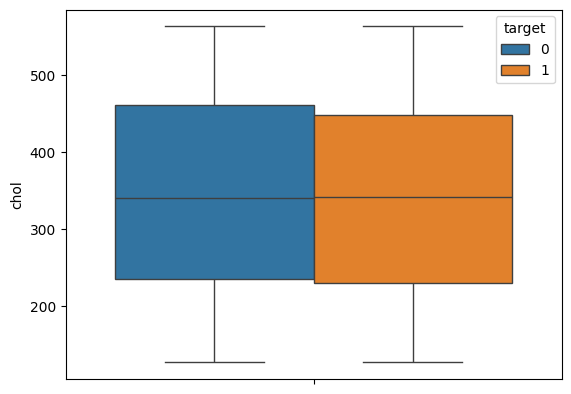

In [ ]:
sns.boxplot(y=train['chol'], hue=train['target'])

In [ ]:
# draw the plot of chol column grouped by target column using plotly
fig = go.Figure()
fig.add_trace(go.Violin(y=train['chol'].values , name='All Patient', marker_color = 'green'))
fig.add_trace(go.Violin(y=train[train['target']== 0]['chol'].values, name ='No Disease', marker_color = 'blue'))
fig.add_trace(go.Violin(y=train[train['target'] == 1]['chol'].values, name ='Heart Disease', marker_color = 'red'))
fig.update_layout(title = 'Cholesterol Level Distribution', yaxis_title = 'Cholesterol Level', title_x = 0.5 )
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

### Lets Explore Thal ( Thalesmia)

- Normal: Within expected or healthy parameters.

- Reversible Defect: An abnormality that can potentially be corrected or improved.

- Fixed Defect: An abno

In [ ]:
train['thal'].value_counts()

thal
1    1879
3    1822
2    1813
0    1789
Name: count, dtype: int64

In [ ]:
# Group by thal by sex
train.groupby('thal')['Sex'].value_counts()

thal  Sex
0     0      895
      1      894
1     1      943
      0      936
2     0      929
      1      884
3     1      928
      0      894
Name: count, dtype: int64

<Axes: xlabel='thal', ylabel='count'>

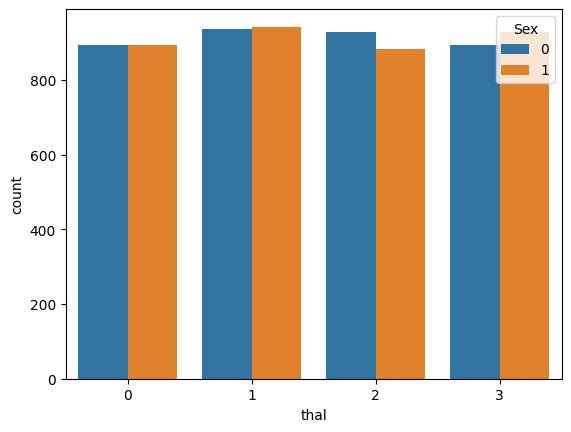

In [ ]:
# count plot of cp column by dataset column
sns.countplot(train, x='thal', hue='Sex')

In [ ]:
# draw the plot of thal column grouped by age column using plotly
fig = px.histogram(data_frame=train, x='Age', color='thal')
fig.show()

In [ ]:
# draw the plot of cp column grouped by targetcolumn using plotly
fig = px.histogram(train, x="Age", color="thal", barmode="group")
fig.show()

In [ ]:
# Plot or groupby to check the people who have thal does the have cp
train.groupby('thal')['cp'].value_counts()
# Plot to Visualize
sns.countplot(train, x='thal', hue='cp')

<Axes: xlabel='thal', ylabel='count'>

In [ ]:
# Now Check People with Thal Survive or Not
train.groupby('thal')['target'].value_counts()
# Plot to Visualize
sns.countplot(train, x='thal', hue='target' , palette='viridis')

<Axes: xlabel='thal', ylabel='count'>

### Lets Deal With Num , The Target Variable
- 0= No heart disease
- 1 = Heart disease

In [ ]:
train['target'].value_counts()

target
1    5941
0    1362
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

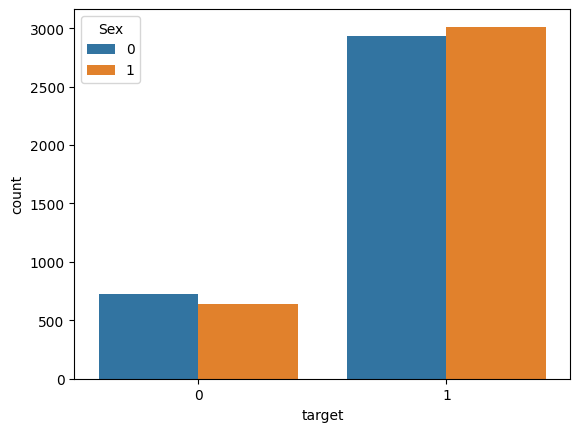

In [ ]:
# Groupby target with sex
train.groupby('target')['Sex'].value_counts()
# Plot to Visualize
sns.countplot(train, x='target', hue='Sex')

<Axes: xlabel='Age', ylabel='Count'>

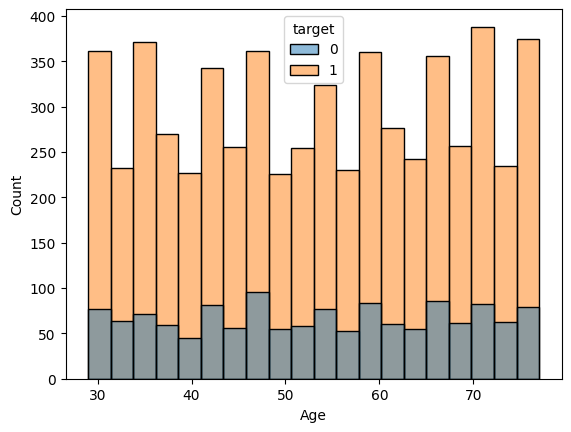

In [ ]:
# groupby target by age
train.groupby('target')['Age'].value_counts()
# Plot to Visualize
sns.histplot(train, x='Age', hue='target')

In [ ]:
# Make Histplot using Plotly
px.histogram(data_frame=train, x='Age', color='target')

In [ ]:
# draw the plot of cp column grouped by targetcolumn using plotly
fig = px.histogram(train, x="Age", color="target", barmode="group")
fig.show()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


In [ ]:
train.isna().sum()

Id          0
Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
train.columns

Index(['Id', 'Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
numeric_cols = ['Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

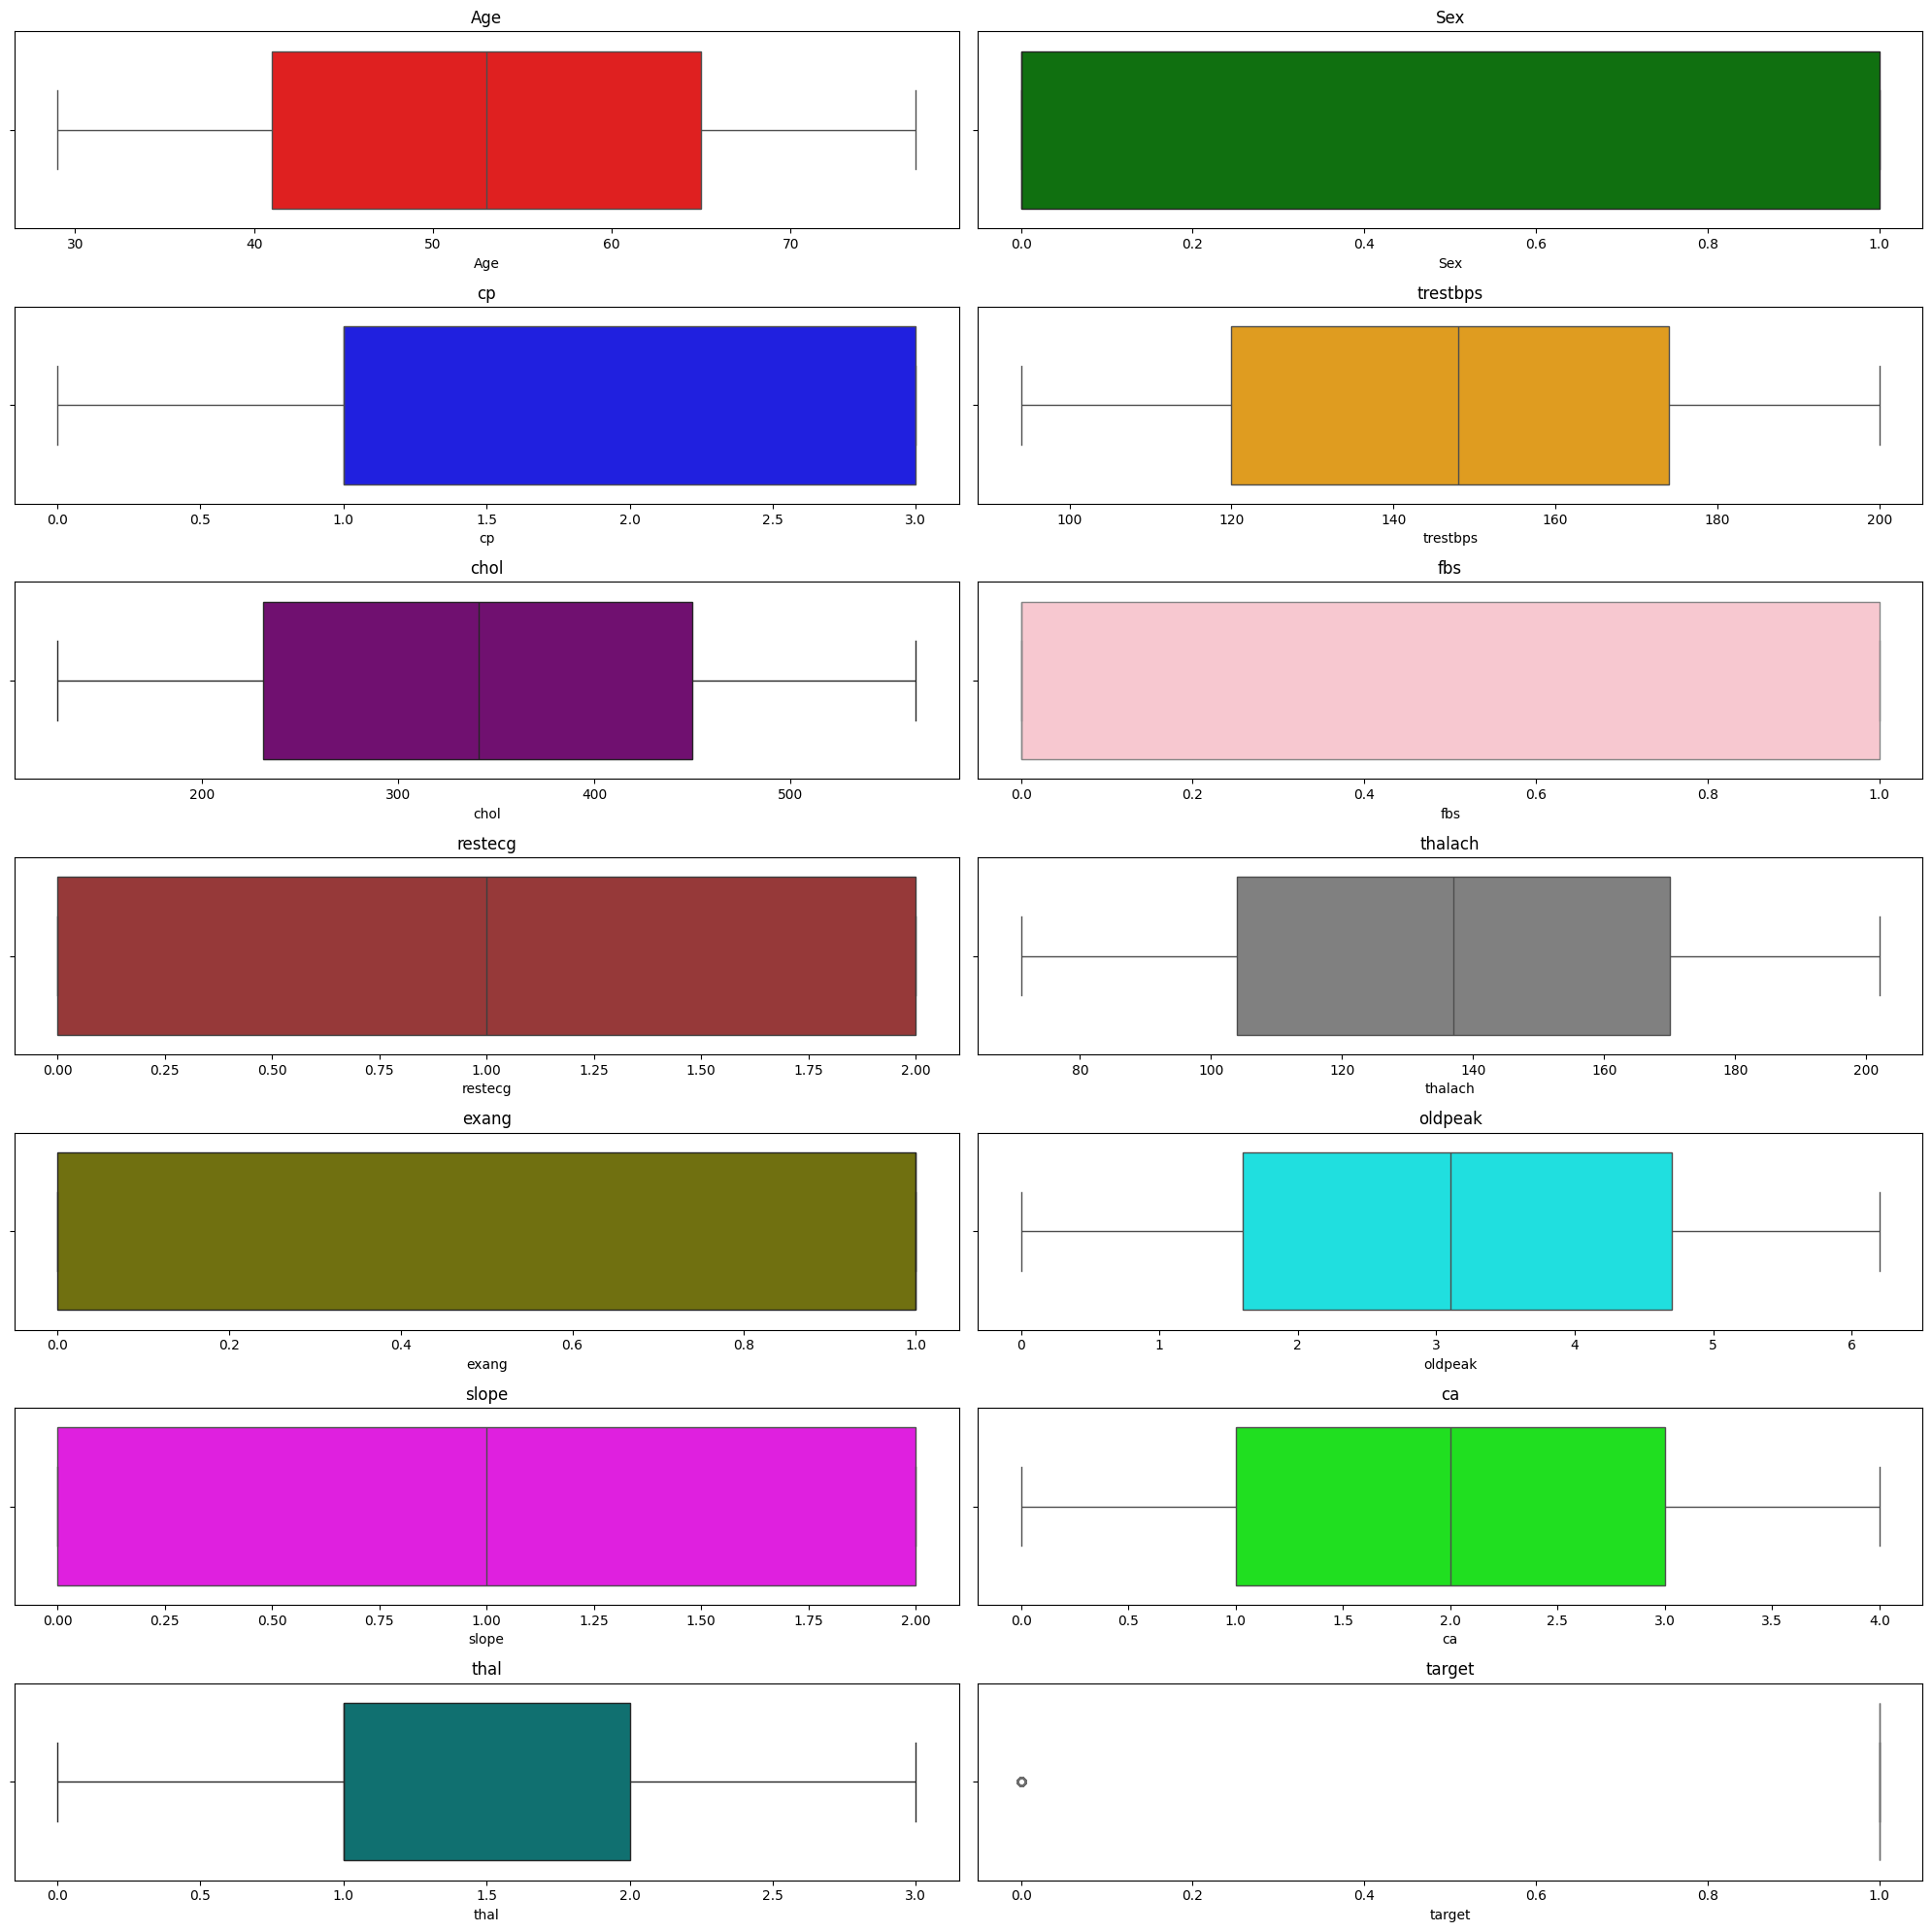

In [ ]:
import matplotlib.pyplot as plt
# create box plots for all numeric columns using for loop and subplot
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink', 'brown', 'gray', 'olive', 'cyan', 'magenta', 'lime', 'teal', 'salmon']

for i, col in enumerate(numeric_cols):
    plt.subplot(7, 2, i+1)  # Adjust the number of rows and columns based on the number of columns
    sns.boxplot(x=train[col], color=colors[i % len(colors)])  # Cycle through the colors if there are more columns than colors
    plt.title(col)
plt.tight_layout() # To prevent overlapping of plots
plt.show()


In [ ]:
# # create box plots for all numeric columns using for loop and subplot
# plt.figure(figsize=(20, 20))

# colors = ['red', 'green', 'blue', 'orange', 'purple']

# for i, col in enumerate(numeric_cols):
#     plt.subplot(3, 2, i+1)
#     sns.boxplot(x=df[col], color=colors[i])
#     plt.title(col)
# plt.show()

In [ ]:
# print the row from df where trestbps value is 0
train[train['trestbps'] == 0]
# remove this row from data
train= train[train['trestbps'] != 0]

# Model Creation

In [ ]:
# Load Again The Clean Data
data = train.copy()
data.head()

Id  Age  Sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  16167   33    0   1       158   205    1        0      154      0      1.5   
1  11275   53    1   2       198   154    0        1      104      0      0.8   
2  13251   37    1   2       101   202    1        0      155      0      2.1   
3  19921   75    0   0       113   306    1        2       88      1      4.9   
4  11293   35    1   2       139   419    1        1      166      1      0.9   

   slope  ca  thal  target  
0      1   4     1       1  
1      2   1     0       0  
2      1   3     1       1  
3      0   2     2       1  
4      2   4     0       1

In [ ]:
train.columns

Index(['Id', 'Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
# Genrating New Dataset with Less Columns Which Are Necessary .
data_1 = data[['Age','Sex','cp', 'trestbps', 'chol', 'fbs','restecg' , 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal','target']].copy()

In [ ]:
def train_random_forest(data, target):
    # Dictionary to store LabelEncoders for each categorical column
    label_encoders = {}

    # split the data into X and y
    X = data.drop(target, axis=1)
    y = data[target]

    # Create a new LabelEncoder for each categorical column
    for col in X.select_dtypes(include=['object', 'category']).columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le

    # split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Scaling Data
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define the Random Forest model
    rf_model = RandomForestClassifier(random_state=0,class_weight='balanced')

    # Define hyperparameters for tuning
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best model and parameters
    best_rf_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Print the best hyperparameters
    print('Best Hyperparameters:')
    print(best_params)

    # Train the model on the full training set
    best_rf_model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = best_rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Accuracy on Test Set: {accuracy:.2f}')

    # Inverse transform at the End
    # Loop through each column to decode the data
    for col, le in label_encoders.items():
        # Use the inverse_transform method to decode the column in both training and test sets
        X[col] = le.inverse_transform(X[col])

    return best_rf_model, best_params, accuracy
# Model acuracy = 81%

In [ ]:
#train_random_forest(data_1, 'target')

In [ ]:
test.head()

id  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  16501   70    1   0       163   495    0        2      170      1      2.0   
1  10444   61    1   0       131   238    0        2       74      1      4.9   
2  14288   53    1   0        95   558    1        1       73      1      0.7   
3  10409   37    0   1       178   287    0        1      192      1      5.7   
4  17330   35    0   3       104   281    0        0      122      0      1.3   

   slope  ca  thal  
0      1   0     1  
1      2   2     2  
2      1   1     0  
3      1   0     0  
4      1   4     3

In [ ]:
#test.rename(columns={'id': 'Id','age':'Age','sex':'Sex'}, inplace=True)

In [ ]:
#best_rf_model

In [ ]:
# train_random_forest(data_1, 'target')

In [ ]:
def train_xgb_classifier(data, target):
    # split the data into X and y
    X = data.drop(target, axis=1)
    y = data[target]

    # encode X data using separate label encoder for all categorical columns and save it for inverse transform
    # Task: Separate Encoder for all cat and object columns and inverse transform at the end

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
        else:
            pass

    # split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,stratify)


    # Scaling Data
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define the XGBClassifier model
    xgb_model = XGBClassifier(random_state=0)

    # Define hyperparameters for tuning
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 1, 2]
    }

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best model and parameters
    best_xgb_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Print the best hyperparameters
    print('Best Hyperparameters:')
    print(best_params)

    # Train the model on the full training set
    best_xgb_model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = best_xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy on Test Set: {accuracy:.2f}')


    return best_xgb_model, best_params,accuracy
# Model acuracy = 79%

In [ ]:
#train_xgb_classifier(data_1,'target')

In [ ]:
# def make_final_prediction(model, test_data, target):
#     # Encode categorical columns in test data using the same label encoder used during training
#     label_encoder = LabelEncoder()
#     for col in test_data.columns:
#         if test_data[col].dtype == 'object' or test_data[col].dtype == 'category':
#             test_data[col] = label_encoder.fit_transform(test_data[col])
#         else:
#             pass
#     # Scaling Data using MinMaxScaler
#     scaler = MinMaxScaler()
#     test_data = scaler.fit_transform(test_data)
#     # Make Predictions using trained model
#     predictions = model.predict(test_data)
#     return predictions


In [ ]:
# def make_final_prediction(model, test_data, target):
#     # Encode categorical columns in test data using the same label encoder used during training
#     label_encoder = LabelEncoder()
#     for col in test_data.columns:
#         if test_data[col].dtype == 'object' or test_data[col].dtype == 'category':
#             test_data[col] = label_encoder.fit_transform(test_data[col])
#         else:
#             pass
#     # Scaling Data using MinMaxScaler
#     scaler = MinMaxScaler()
#     test_data = scaler.fit_transform(test_data)
#     # Make Predictions using trained model
#     predictions = model.predict(test_data)
#     return predictions


In [ ]:
# Load Again The Clean Data
data_test = test.copy()
data_test.head()

Id  Age  Sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  16501   70    1   0       163   495    0        2      170      1      2.0   
1  10444   61    1   0       131   238    0        2       74      1      4.9   
2  14288   53    1   0        95   558    1        1       73      1      0.7   
3  10409   37    0   1       178   287    0        1      192      1      5.7   
4  17330   35    0   3       104   281    0        0      122      0      1.3   

   slope  ca  thal  
0      1   0     1  
1      2   2     2  
2      1   1     0  
3      1   0     0  
4      1   4     3

In [ ]:
# Genrating New Dataset with Less Columns Which Are Necessary .
# data__test_1 = data[['Age','Sex','cp', 'trestbps', 'chol', 'fbs','restecg' , 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].copy()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

# # 1. Load the dataset
# data = pd.read_csv('heart_disease_data.csv')

# # 2. Basic data exploration
# print(data.info())
# print(data.describe())

# # 3. Data preprocessing

# Define categorical and numeric features
categorical_features = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'restecg', 'exercise_induced_angina']
numeric_features = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'oldpeak', 'st_slope']

# Preprocessing for numeric data (impute missing values, then scale)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data (impute missing values, then one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 4. Split the data
X = data.drop(columns=['target'])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 5. Build individual models

# Logistic Regression
logreg = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', LogisticRegression(solver='liblinear'))])

# Random Forest
rf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', RandomForestClassifier(random_state=42))])

# XGBoost
xgb = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))])

# 6. Use an ensemble of models (Voting Classifier)
voting_clf = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('rf', rf),
    ('xgb', xgb)
], voting='soft')

# 7. Cross-validation and training
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    voting_clf.fit(X_train_fold, y_train_fold)
    y_val_pred = voting_clf.predict_proba(X_val_fold)[:, 1]
    auc_score = roc_auc_score(y_val_fold, y_val_pred)
    cv_scores.append(auc_score)

print(f'Average cross-validated AUC: {np.mean(cv_scores):.4f}')

# 8. Final training on the entire training set
voting_clf.fit(X_train, y_train)

# 9. Make predictions on the test set
y_test_pred = voting_clf.predict_proba(X_test)[:, 1]

# 10. Evaluate model on the test set
test_auc = roc_auc_score(y_test, y_test_pred)
print(f'Test AUC: {test_auc:.4f}')

# 11. Create the submission file
submission = pd.DataFrame({
    'id': X_test.index,
    'prediction': y_test_pred
})

# Save submission
submission.to_csv('heart_disease_prediction_submission.csv', index=False)


In [ ]:
# # draw the plot of cp column grouped by num column using plotly
# fig = px.histogram(data_frame=df, x='cp', color='num')
# fig.show()

In [ ]:
correlation = train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
train.columns

Index(['Id', 'Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
# Plot histograms for numerical features
numerical_features = ['Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
train[numerical_features].hist(figsize=(15, 15), bins=15)
plt.suptitle('Distribution of Numerical Features')
plt.show()

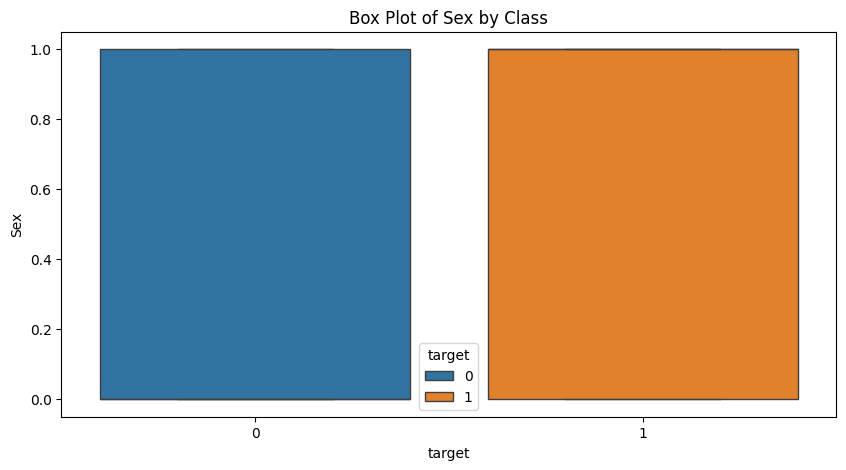

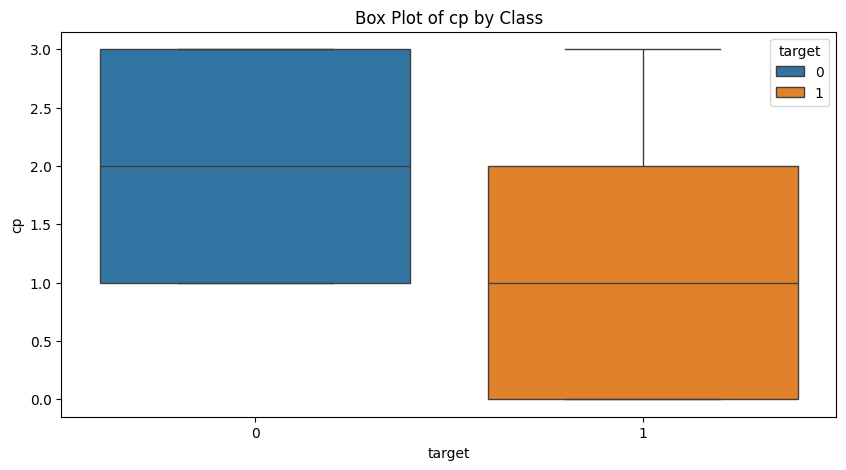

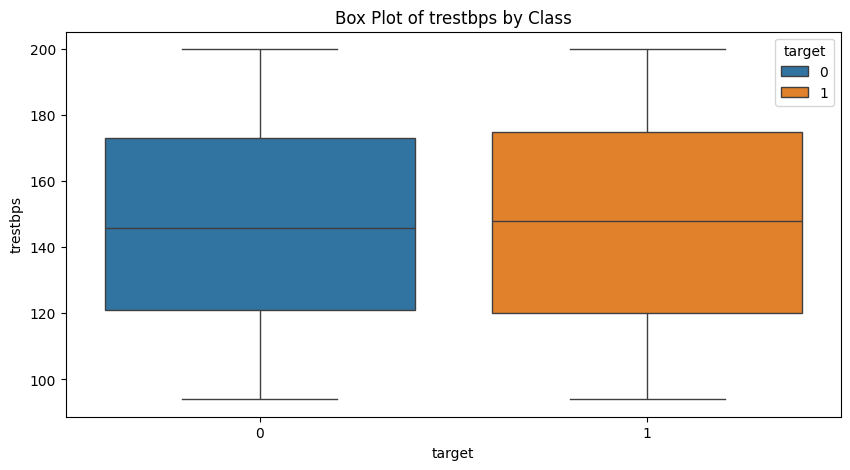

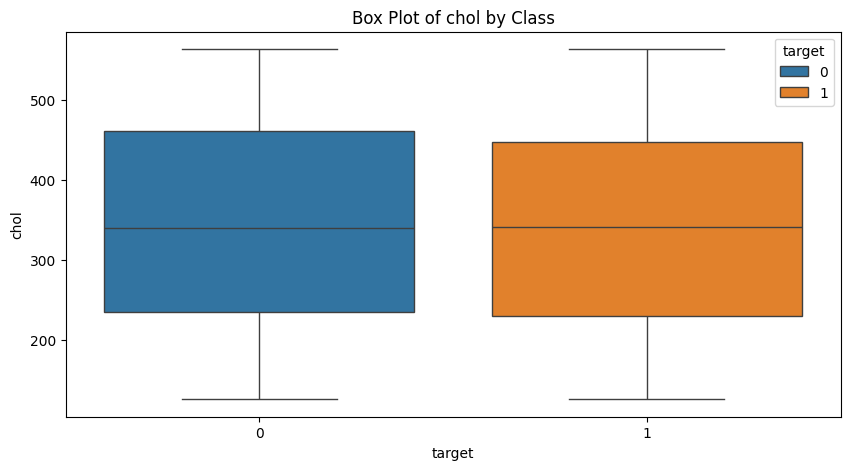

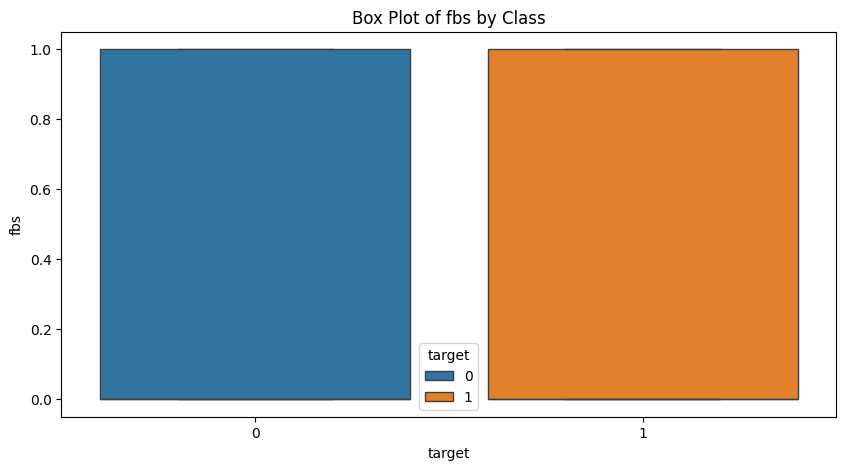

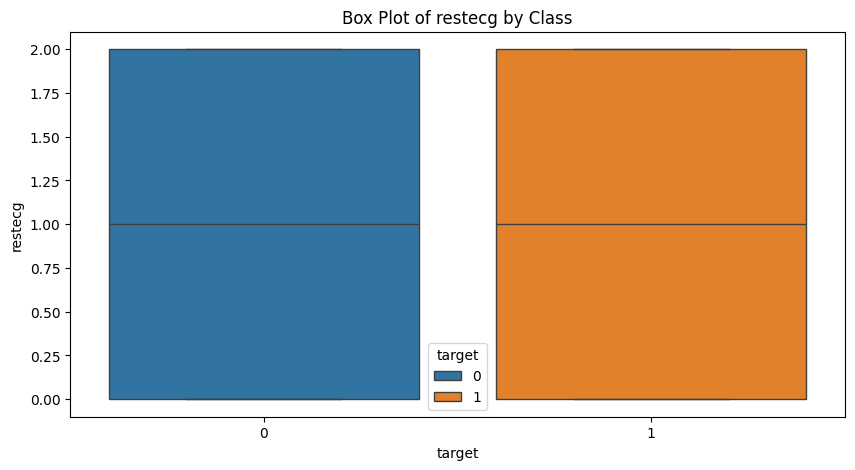

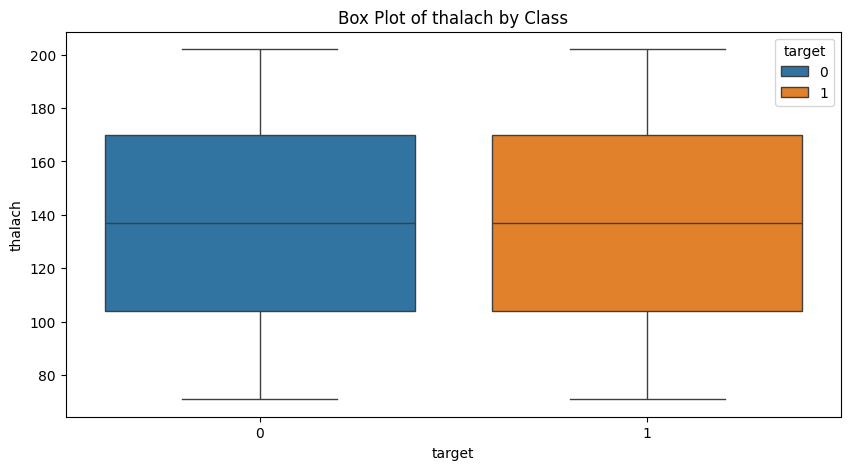

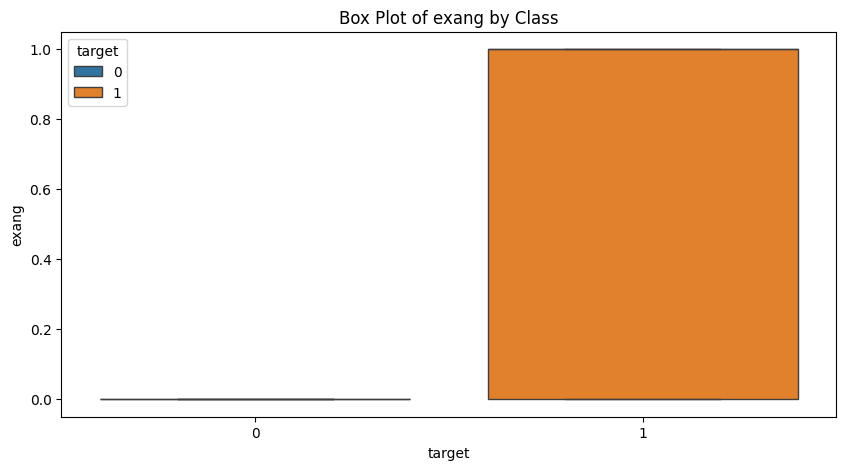

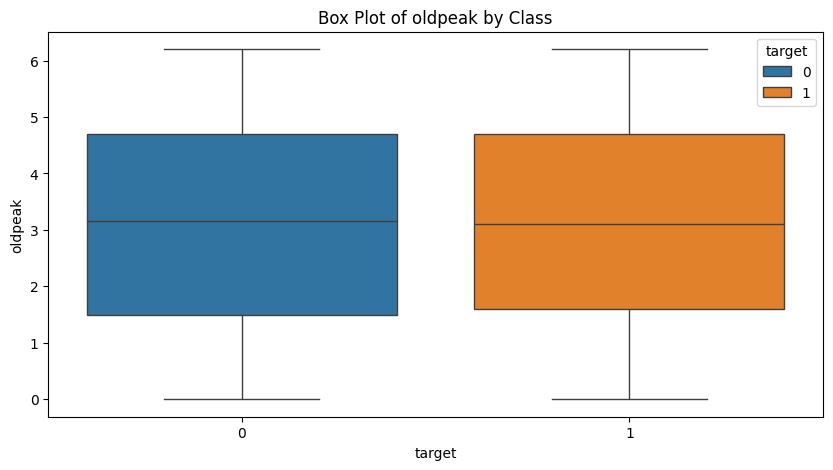

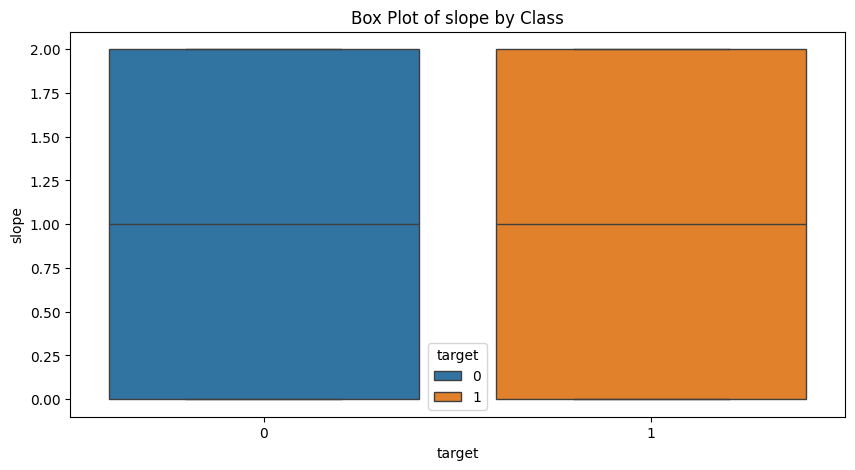

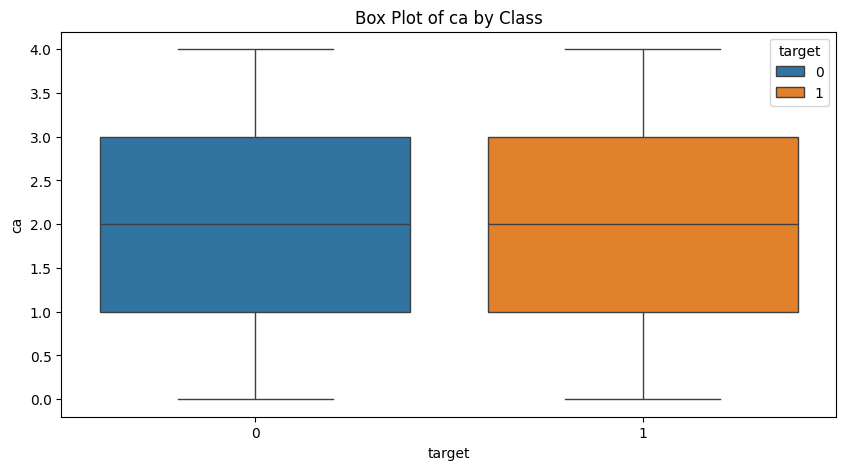

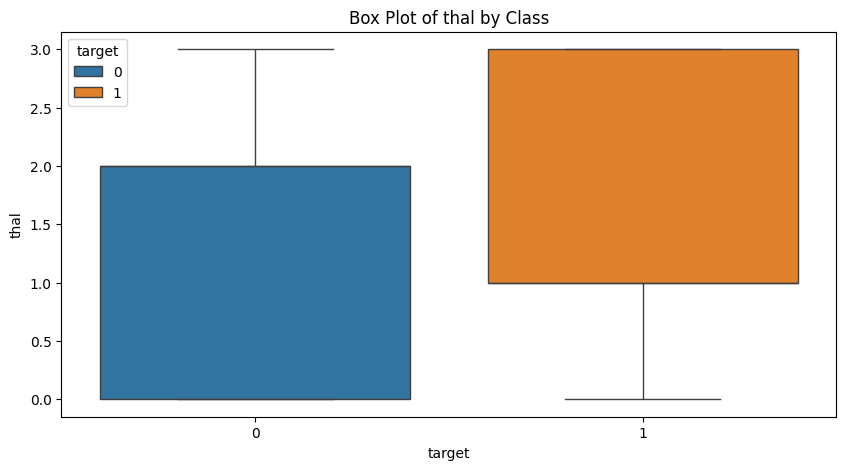

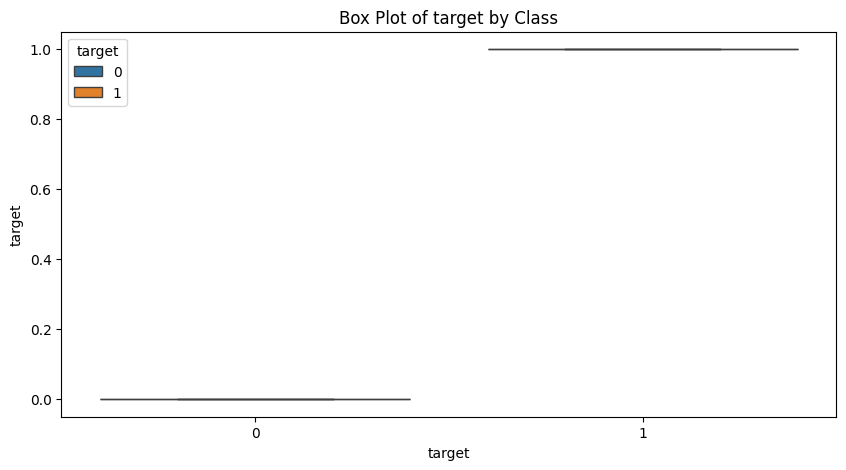

In [ ]:
# Plot box plots for numerical features
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='target', y=col, data=train,hue='target')
    plt.title(f'Box Plot of {col} by Class')
    plt.show()

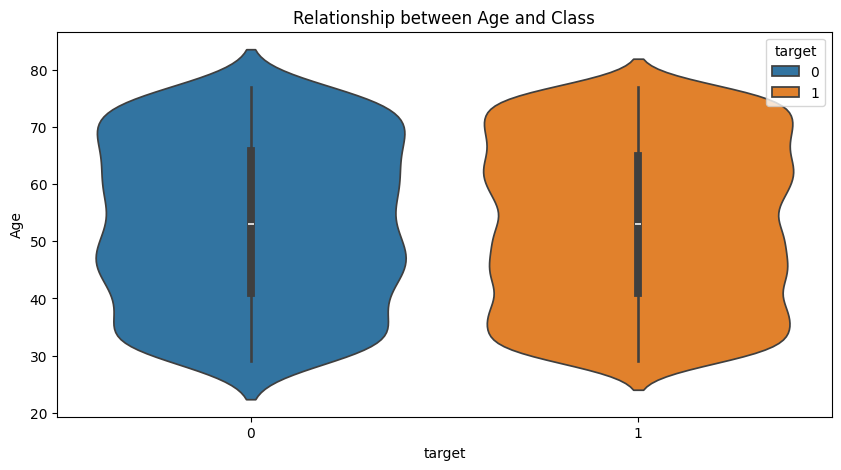

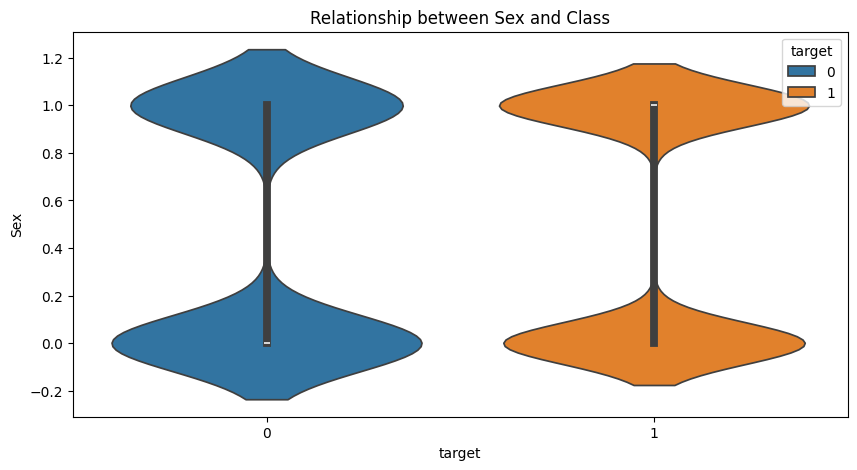

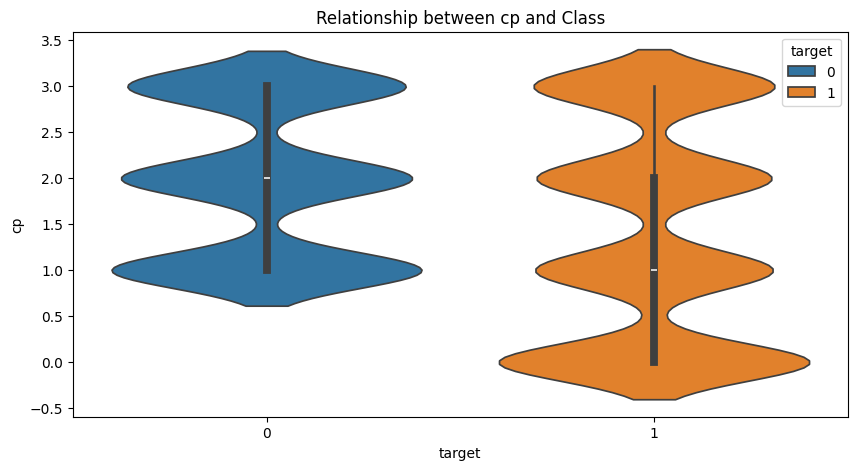

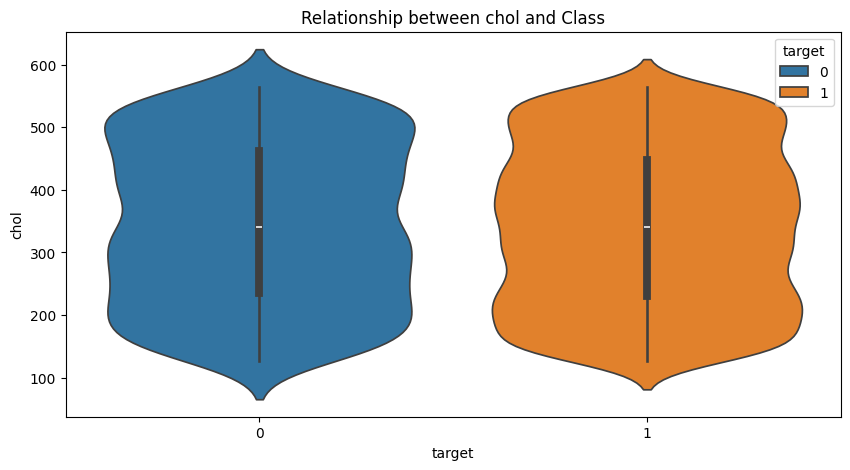

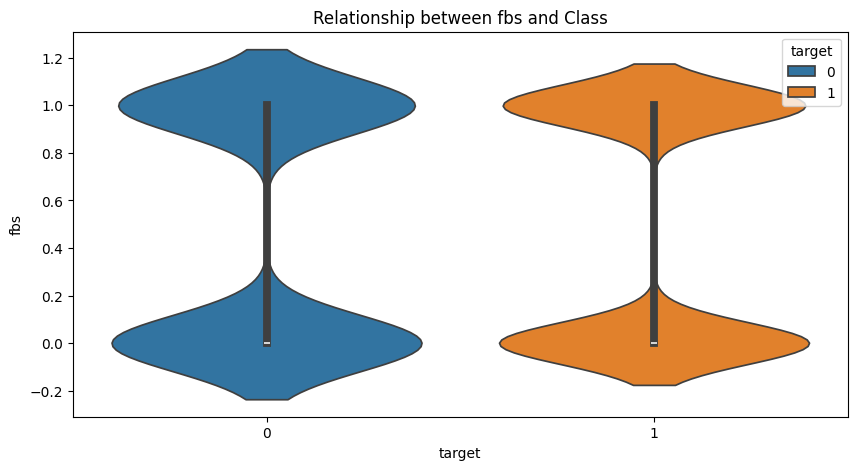

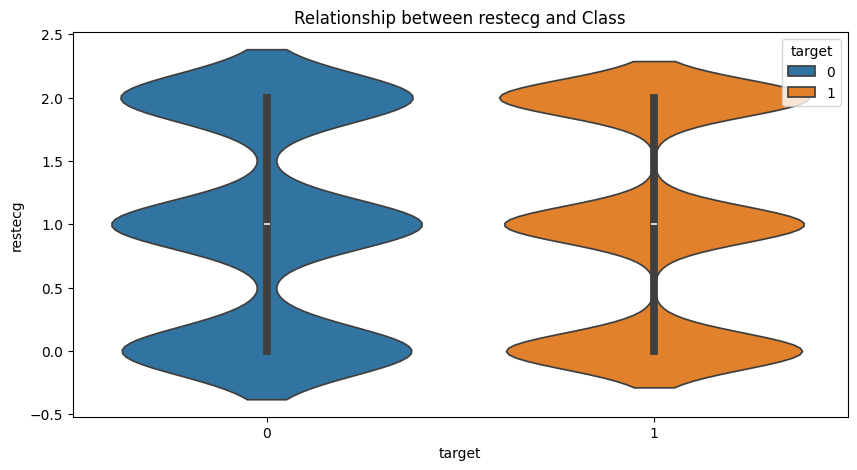

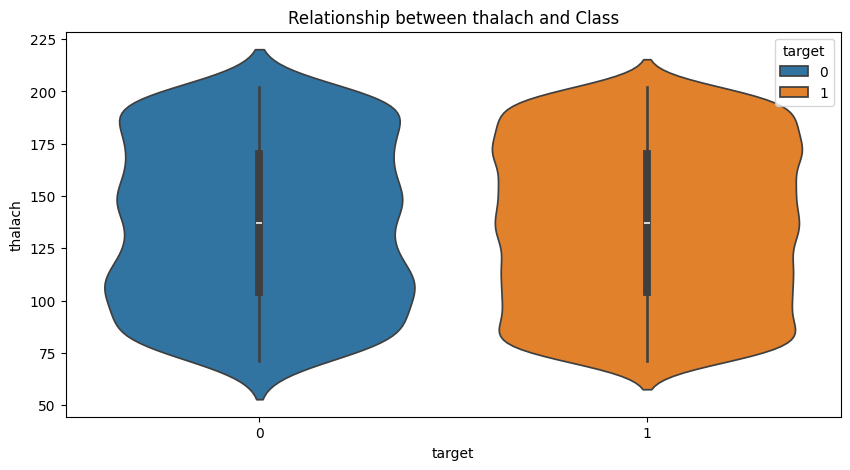

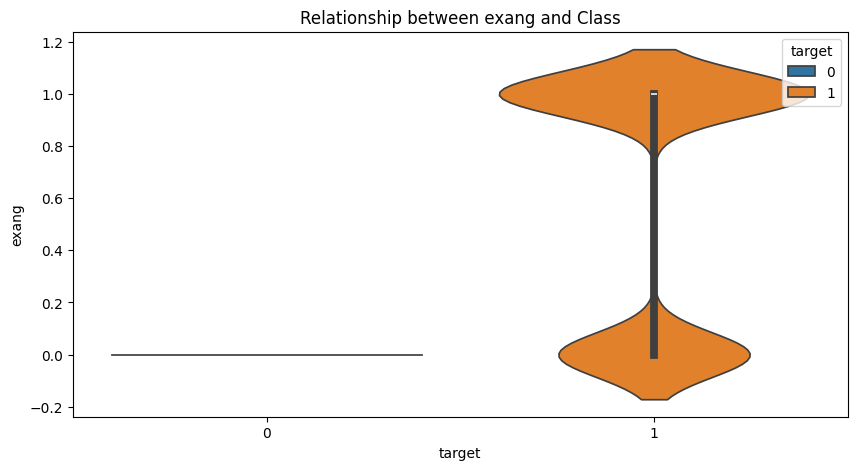

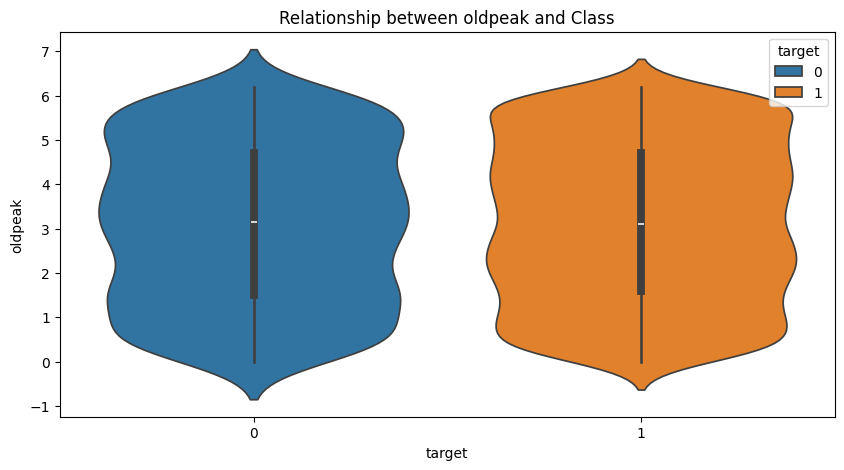

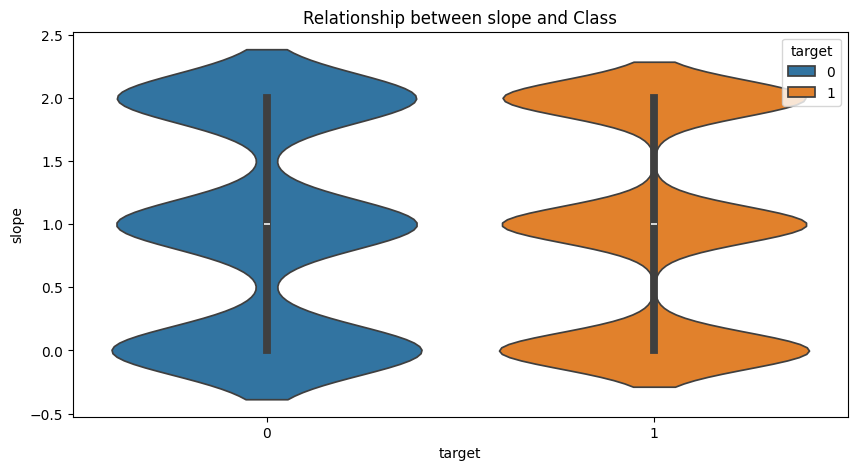

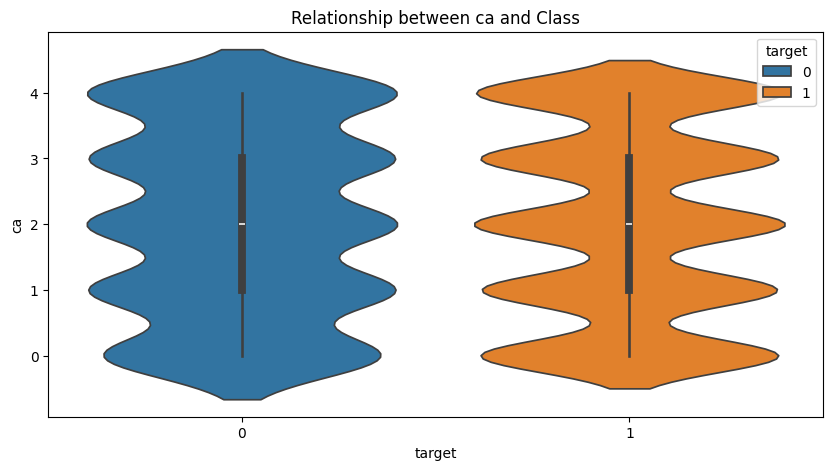

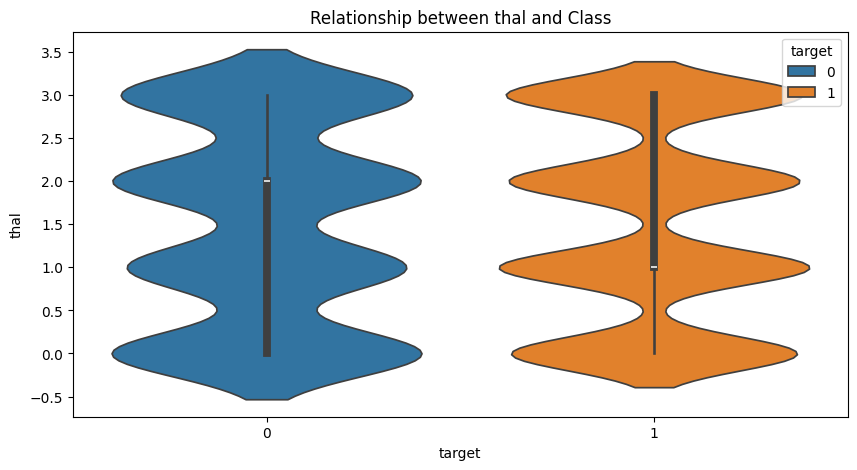

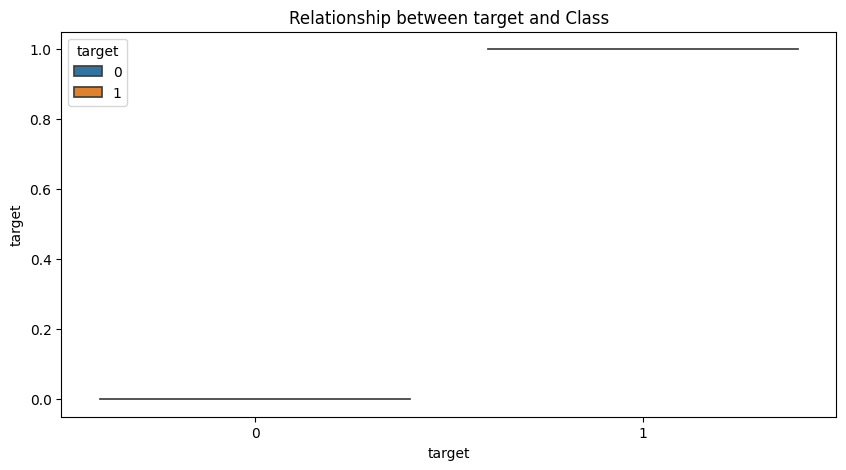

In [ ]:
# Plot the relationship between numerical features and the target variable
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x='target', y=col, data=train,hue='target')
    plt.title(f'Relationship between {col} and Class')
    plt.show()

In [ ]:
# Calculate the correlation of features with the target variable 'CHURN'
correlation_with_target = train.corr()['target'].sort_values(ascending=False)
correlation_with_target

target      1.000000
exang       0.481897
Sex         0.030608
trestbps    0.009320
Id          0.006148
restecg     0.005911
thal        0.005709
oldpeak     0.004899
fbs         0.003925
slope       0.001909
Age        -0.002846
thalach    -0.004634
ca         -0.008244
chol       -0.012291
cp         -0.198082
Name: target, dtype: float64

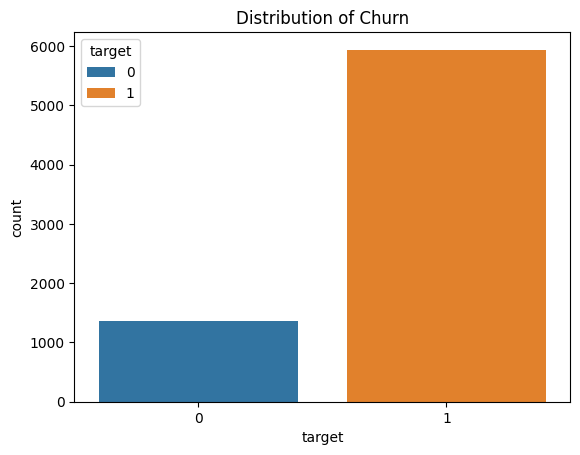

In [ ]:
# Visualizing the target variable 'CHURN'
sns.countplot(x='target', data=train,hue='target')
plt.title('Distribution of Churn')
plt.show()

In [ ]:
# Descriptive statistics of the training data
train.describe()

Id          Age          Sex           cp     trestbps  \
count   7303.000000  7303.000000  7303.000000  7303.000000  7303.000000   
mean   15021.535396    53.172669     0.499658     1.502533   147.447487   
std     2886.026080    14.185970     0.500034     1.115594    31.099538   
min    10001.000000    29.000000     0.000000     0.000000    94.000000   
25%    12521.500000    41.000000     0.000000     1.000000   120.000000   
50%    15054.000000    53.000000     0.000000     1.000000   148.000000   
75%    17513.500000    65.000000     1.000000     3.000000   174.000000   
max    19998.000000    77.000000     1.000000     3.000000   200.000000   

              chol          fbs      restecg      thalach        exang  \
count  7303.000000  7303.000000  7303.000000  7303.000000  7303.000000   
mean    342.805970     0.493085     1.013008   136.506093     0.503218   
std     127.291998     0.499986     0.815806    38.141966     0.500024   
min     126.000000     0.000000     0.000000    71.000000     0.000000   
25%     231.000000     0.000000     0.000000   104.000000     0.000000   
50%     341.000000     0.000000     1.000000   137.000000     1.000000   
75%     450.000000     1.000000     2.000000   170.000000     1.000000   
max     564.000000     1.000000     2.000000   202.000000     1.000000   

           oldpeak        slope           ca         thal       target  
count  7303.000000  7303.000000  7303.000000  7303.000000  7303.000000  
mean      3.129851     0.991510     2.019033     1.502259     0.813501  
std       1.791160     0.817291     1.410546     1.113137     0.389535  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       1.600000     0.000000     1.000000     1.000000     1.000000  
50%       3.100000     1.000000     2.000000     1.000000     1.000000  
75%       4.700000     2.000000     3.000000     2.000000     1.000000  
max       6.200000     2.000000     4.000000     3.000000     1.000000

In [ ]:
test.head()

id  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  16501   70    1   0       163   495    0        2      170      1      2.0   
1  10444   61    1   0       131   238    0        2       74      1      4.9   
2  14288   53    1   0        95   558    1        1       73      1      0.7   
3  10409   37    0   1       178   287    0        1      192      1      5.7   
4  17330   35    0   3       104   281    0        0      122      0      1.3   

   slope  ca  thal  
0      1   0     1  
1      2   2     2  
2      1   1     0  
3      1   0     0  
4      1   4     3

In [ ]:
test.rename(columns={'id': 'Id','age':'Age','sex':'Sex'}, inplace=True)

## Data Preprocessing

In [ ]:
# Dropping target variable from training data
target_1 = train['target']
train = train.drop('target', axis=1)

In [ ]:
# Combine train and test data for uniform preprocessing
data = pd.concat([train, test], sort=False)
data.head()

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

In [ ]:
# Calculate the percentage of missing values
missing_percentage = (missing_values / len(data)) * 100

# Combine the missing values and their percentages into a DataFrame
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Display the DataFrame sorted by percentage of missing values in descending order
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)
missing_data

In [ ]:
# # Fill missing values in categorical columns with "Missing_{column_name}"
# for col in data.select_dtypes(include=['object']).columns:
#     data[col].fillna(f'Missing_{col}', inplace=True)

# Fill missing values in numerical columns with the median
for col in data.select_dtypes(include=[np.number]).columns:
    data[col].fillna(data[col].median(), inplace=True)

# Verify that there are no missing values left
data.isnull().sum()

In [ ]:
# Display the number of unique categories in all object columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Create a DataFrame to display the results
unique_categories = pd.DataFrame({
    'Column': categorical_columns,
    'Unique Categories': [data[col].nunique() for col in categorical_columns]
})

unique_categories = unique_categories.sort_values(by='Unique Categories', ascending=False)
unique_categories

In [ ]:
# Drop the 'user_id' as it is not useful for the model
data = data.drop('Id', axis=1)

In [ ]:
# Split the combined data back into train and test sets
train = data.iloc[:len(target_1), :]
test = data.iloc[len(target_1):, :]

#Model Building

In [ ]:
!pip install catboost

In [ ]:
data.head()

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, log_loss, confusion_matrix

In [ ]:
# Splitting the training data into train and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(train, target_1, test_size=0.2, random_state=42)

In [ ]:
# prompt: cross val spliiting

import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the number of folds for cross-validation
n_splits = 5

# Create a StratifiedKFold object to ensure balanced class distribution in each fold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize an empty list to store the cross-validation scores
cv_scores = []

# Iterate through the folds
for train_index, val_index in skf.split(train, target_1):
  # Split the data into training and validation sets for the current fold
  X_train_fold, X_val_fold = train.iloc[train_index], train.iloc[val_index]
  Y_train_fold, Y_val_fold = target_1.iloc[train_index], target_1.iloc[val_index]

  # Train your model on the training data of the current fold
  # (Replace this with your model training code)
  model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_seed=42)
  model.fit(X_train_fold, Y_train_fold, verbose=False)

  # Make predictions on the validation data of the current fold
  Y_pred_fold = model.predict(X_val_fold)

  # Calculate the accuracy score for the current fold
  accuracy = accuracy_score(Y_val_fold, Y_pred_fold)

  # Append the accuracy score to the list of cross-validation scores
  cv_scores.append(accuracy)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {mean_cv_score}")
print(f"Standard deviation of CV scores: {std_cv_score}")


Cross-validation scores: [0.8220396988364134, 0.8172484599589322, 0.8021902806297057, 0.8116438356164384, 0.821917808219178]
Mean CV score: 0.8150080166521334
Standard deviation of CV scores: 0.0074541455691886395


In [ ]:

from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the number of folds for cross-validation
n_splits = 5

# Create a StratifiedKFold object to ensure balanced class distribution in each fold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize an empty list to store the cross-validation scores
cv_scores = []

# Iterate through the folds
for train_index, val_index in skf.split(train, target_1):
  # Split the data into training and validation sets for the current fold
  X_train_fold, X_val_fold = train.iloc[train_index], train.iloc[val_index]
  Y_train_fold, Y_val_fold = target_1.iloc[train_index], target_1.iloc[val_index]

  # Train your model on the training data of the current fold
  # (Replace this with your model training code)
  model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_seed=42)
  model.fit(X_train_fold, Y_train_fold, verbose=False)

  # Make predictions on the validation data of the current fold
  Y_pred_fold = model.predict(X_val_fold)

  # Calculate the accuracy score for the current fold
  accuracy = accuracy_score(Y_val_fold, Y_pred_fold)

  # Append the accuracy score to the list of cross-validation scores
  cv_scores.append(accuracy)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {mean_cv_score}")
print(f"Standard deviation of CV scores: {std_cv_score}")


In [ ]:
# Initializing and training the CatBoostClassifier
classifier = CatBoostClassifier(loss_function='Logloss', learning_rate=0.01, use_best_model=True, eval_metric='Accuracy')
classifier.fit(X_train, Y_train, eval_set=(X_val, Y_val), early_stopping_rounds=1000, verbose=100)

0:	learn: 0.8158165	test: 0.8193018	best: 0.8193018 (0)	total: 39.4ms	remaining: 39.3s
100:	learn: 0.8515919	test: 0.8110883	best: 0.8302533 (12)	total: 1.11s	remaining: 9.88s
200:	learn: 0.8902773	test: 0.8199863	best: 0.8302533 (12)	total: 2.37s	remaining: 9.4s
300:	learn: 0.9164670	test: 0.8213552	best: 0.8302533 (12)	total: 3.9s	remaining: 9.05s
400:	learn: 0.9310168	test: 0.8179329	best: 0.8302533 (12)	total: 5.43s	remaining: 8.12s
500:	learn: 0.9392331	test: 0.8227242	best: 0.8302533 (12)	total: 7.78s	remaining: 7.74s
600:	learn: 0.9447107	test: 0.8199863	best: 0.8302533 (12)	total: 9.37s	remaining: 6.22s
700:	learn: 0.9507018	test: 0.8193018	best: 0.8302533 (12)	total: 10.4s	remaining: 4.46s
800:	learn: 0.9577200	test: 0.8151951	best: 0.8302533 (12)	total: 11.4s	remaining: 2.82s
900:	learn: 0.9633687	test: 0.8165640	best: 0.8302533 (12)	total: 12.2s	remaining: 1.34s
999:	learn: 0.9693598	test: 0.8193018	best: 0.8302533 (12)	total: 13.6s	remaining: 0us

bestTest = 0.8302532512
be

#Model Evaluation

In [ ]:
Y_pred = classifier.predict(X_val)
print("Accuracy:", accuracy_score(Y_val, Y_pred))
print("Classification Report:\n", classification_report(Y_val, Y_pred))

Accuracy: 0.8302532511978097
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.45      0.49       260
           1       0.89      0.91      0.90      1201

    accuracy                           0.83      1461
   macro avg       0.71      0.68      0.69      1461
weighted avg       0.82      0.83      0.83      1461



In [ ]:
# Predicting probabilities for log loss calculation
Y_pred_proba = classifier.predict_proba(X_val)[:, 1]
print("Log Loss:", log_loss(Y_val, Y_pred_proba))

Log Loss: 0.4993580863658914


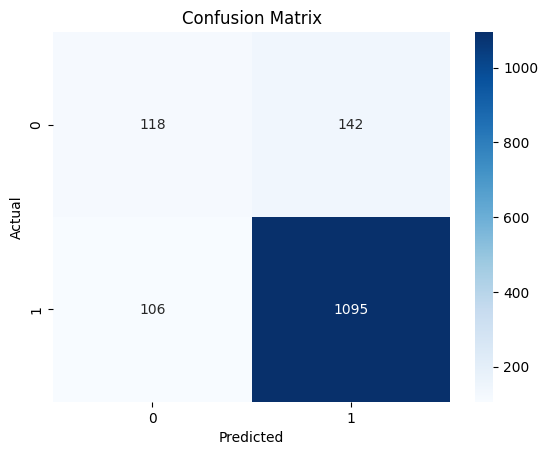

In [ ]:
# Confusion matrix
cm = confusion_matrix(Y_val, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance


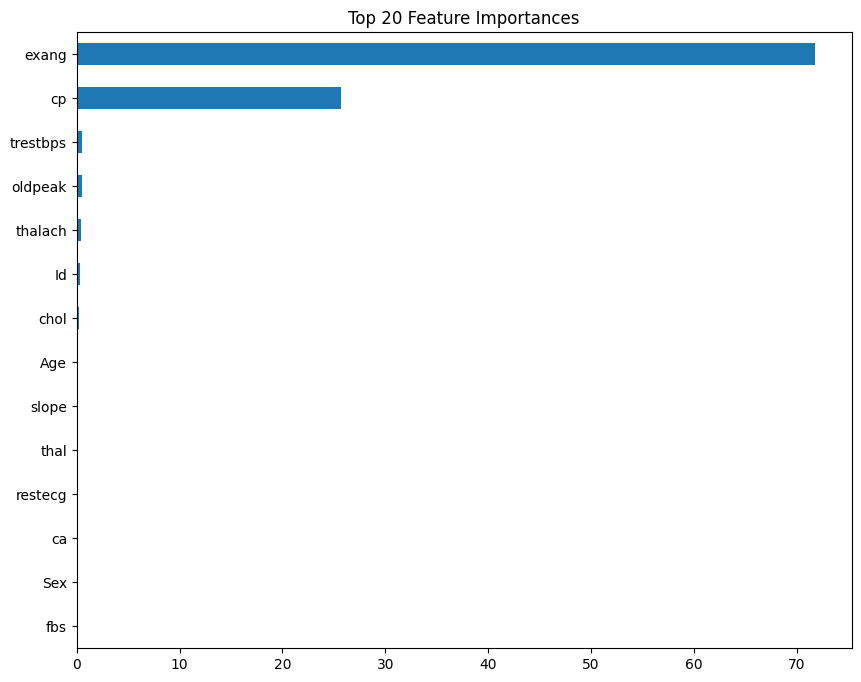

In [ ]:
# Get the feature importances from the classifier
feature_importances = pd.Series(classifier.feature_importances_, index=X_train.columns)

# Sort the feature importances and select the top 20
top_20_features = feature_importances.sort_values(ascending=False).head(20)

# Plot the top 20 feature importances
top_20_features.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Top 20 Feature Importances')
plt.show()

In [ ]:
## Making Predictions on Test Data
# Finally, we use the trained model to make predictions on the test set and prepare the submission file.
predictions = classifier.predict_proba(test)[:, 1]
baseline_sub = submissin.copy()
baseline_sub['target'] = predictions
baseline_sub.to_csv('baseline_submission_ca_3.csv', index=False)

# Display the first few rows of the submission file
baseline_sub.head()

Id    target
0  16501  0.669693
1  10444  0.663113
2  14288  0.657306
3  10409  0.681354
4  17330  0.499792